___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
#!pip install -U scikit-learn

In [3]:
import numpy as np
np.__version__  # np version : 1.23.5

'1.23.5'

In [4]:
import sklearn
sklearn.__version__

'1.2.2'

In [5]:
df = pd.read_csv("Ready_to_ML.csv")

In [6]:
df.head()

make_model           make  \
0     Mercedes-Benz A 160  Mercedes-Benz   
1   Mercedes-Benz EQE 350  Mercedes-Benz   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz   

                                            location     price body_type  \
0  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN... 16950.000   Compact   
1       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES 80900.000   Compact   
2  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8... 69900.000   Compact   
3  Carrer de Provença, 31 Local,  8029 BARCELONA, ES 46990.000   Compact   
4             CARRIL ARAGONES 4,  30007 CASILLAS, ES 16800.000   Compact   

             type warranty    mileage    gearbox fuel_type  seller  \
0            Used      Yes 120200.000     Manual    Diesel  Dealer   
1  Pre-registered      Yes   5000.000  Automatic  Electric  Dealer   
2            Used      Yes  18900.000  Automatic   Benzine  Dealer   
3            Used      Yes  18995.000  Automatic   Benzine  Dealer   
4            Used      Yes 197000.000  Automatic    Diesel  Dealer   

   engine_size  gears  co_emissions drivetrain  \
0     1595.000  5.000        98.000      Front   
1        1.000  1.000         0.000        4WD   
2     1991.000  8.000       162.000        4WD   
3     1991.000  7.000       169.000        4WD   
4     2143.000  7.000       162.000        4WD   

                                              extras  empty_weight  \
0                                       Alloy wheels      1270.000   
1  Alloy wheels (21"), Shift paddles, Sport packa...      2355.000   
2                                       Alloy wheels      1555.000   
3                                        Sport seats      1455.000   
4                                       Alloy wheels      1545.000   

  full_service_history         upholstery  previous_owner  \
0                   No              Cloth           2.000   
1                   No  Part/Full Leather           1.000   
2                   No  Part/Full Leather           2.000   
3                   No  Part/Full Leather           2.000   
4                   No  Part/Full Leather           2.000   

  energy_efficiency_class   age  power_kW  cons_avg  \
0               efficient 6.000    75.000     3.800   
1               efficient 0.000   215.000     2.359   
2             unefficient 2.000   310.000     8.400   
3             unefficient 2.000   225.000     7.300   
4             unefficient 7.000   100.000     4.900   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                       Premium                          Plus   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4  Safety Premium Plus Package

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [8]:
df.describe()

price    mileage  engine_size     gears  co_emissions  \
count  26711.000  26711.000    26711.000 26711.000     26711.000   
mean   23537.241  68863.812     1708.965     5.820       129.526   
std    20811.986  62794.146      772.440     1.417        54.255   
min      490.000      0.000        0.000     1.000         0.000   
25%    12490.000  19155.000     1248.000     5.000       105.000   
50%    18440.000  54000.000     1595.000     6.000       123.000   
75%    28330.000 100675.000     1969.000     6.000       150.000   
max   549000.000 667128.000     6300.000     8.000       399.000   

       empty_weight  previous_owner       age  power_kW  cons_avg  
count     26711.000       26711.000 26711.000 26711.000 26711.000  
mean       1425.205           1.460     5.166   118.414     5.532  
std         307.387           0.853     4.655    65.642     2.220  
min         347.000           1.000     0.000    33.000     0.000  
25%        1228.000           1.000     2.000    80.000     4.300  
50%        1375.000           1.000     4.000   100.000     5.200  
75%        1597.000           2.000     7.000   135.000     6.400  
max        3150.000           9.000    20.000   450.000    18.300

In [9]:
df.duplicated().sum()

1815

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.make_model.value_counts()

# In order for ML models to learn a data well, the data should contain all the details as possible.
# When we look at the number of brand models, we see that the number of models of some brands is very low.
# In order for ML models to accurately predict car prices on a brand-by-model basis,
# there must be enough observations from each brand and model. For this, we exclude brand models under 100 from our data.

Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   208
Dacia Lo

In [13]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', length=420)

In [14]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [15]:
df

make_model           make  \
0      Mercedes-Benz A 180  Mercedes-Benz   
1      Mercedes-Benz A 180  Mercedes-Benz   
2      Mercedes-Benz A 180  Mercedes-Benz   
3      Mercedes-Benz A 180  Mercedes-Benz   
4      Mercedes-Benz A 180  Mercedes-Benz   
...                    ...            ...   
18192            Volvo V40          Volvo   
18193            Volvo S60          Volvo   
18194            Volvo S90          Volvo   
18195            Volvo C30          Volvo   
18196            Volvo S90          Volvo   

                                                location     price body_type  \
0      Bestel gemakkelijk Online 24/7,  1000 Brussel, BE 24400.000   Compact   
1                     Zaackoer Weg 34,  15926 Luckau, DE  7450.000   Compact   
2                     Calle Carbón 19,  29603 MALAGA, ES 29800.000   Compact   
3                    RUA REAL 60,  36860 PONTEAEREAS, ES 21000.000   Compact   
4      Canal de Sant Jordi nº17 Pol. Ind. Son oms,  0... 26800.000   Compact   
...                                                  ...       ...       ...   
18192                                   1000 Brussel, BE 13000.000     Sedan   
18193             CALLE CATALUNYA, 37,  8520 LLERONA, ES  4999.000     Sedan   
18194           HERMANOS LUMIERE Nº16,  29004 MALAGA, ES 37600.000     Sedan   
18195             Sur rendez-vous,  5060 Sambreville, BE  7300.000     Sedan   
18196    Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL 29900.000     Sedan   

       type warranty    mileage    gearbox fuel_type          seller  \
0      Used      Yes  27150.000     Manual    Diesel          Dealer   
1      Used       No 157500.000     Manual    Diesel          Dealer   
2      Used      Yes  21734.000  Automatic    Diesel          Dealer   
3      Used      Yes 172700.000  Automatic    Diesel          Dealer   
4      Used      Yes  18989.000  Automatic    Diesel          Dealer   
...     ...      ...        ...        ...       ...             ...   
18192  Used       No 114000.000     Manual    Diesel  Private seller   
18193  Used      Yes 166512.000     Manual   Benzine          Dealer   
18194  Used      Yes  40345.000  Automatic    Diesel          Dealer   
18195  Used      Yes  96000.000     Manual    Diesel          Dealer   
18196  Used      Yes  94343.000  Automatic   Benzine          Dealer   

       engine_size  gears  co_emissions drivetrain  \
0         1461.000  6.000       120.000      Front   
1         1991.000  6.000       138.000      Front   
2         1461.000  7.000        99.500      Front   
3         1461.000  7.000        99.500      Front   
4         1461.000  7.000        99.500      Front   
...            ...    ...           ...        ...   
18192     1969.000  6.000        94.000      Front   
18193     2521.000  5.000       145.000      Front   
18194     1969.000  8.000       127.000        4WD   
18195     1560.000  6.000        99.000      Front   
18196     1969.000  8.000       149.000        4WD   

                                                  extras  empty_weight  \
0      Alloy wheels, Automatically dimming interior m...      1330.000   
1      Alloy wheels, Automatically dimming interior m...      1295.000   
2                                            Sport seats      1445.000   
3                                            Sport seats      1425.000   
4                                            Sport seats      1455.000   
...                                                  ...           ...   
18192  All season tyres, Ambient lighting, Cargo barr...      1532.000   
18193                                       Alloy wheels      1550.000   
18194                                       Alloy wheels      2077.000   
18195  Alloy wheels, Automatically dimming interior m...      1356.000   
18196  Alloy wheels (18"), Automatically dimming inte...      1617.000   

      full_service_history         upholstery  previous_owner  \
0                       No  Part/Full Leather 

In [16]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

Renault Megane         825
SEAT Leon              757
Dacia Sandero          721
Hyundai i30            699
Opel Astra             634
Ford Mustang           572
Peugeot 308            536
Nissan Qashqai         484
Ford Focus             483
SEAT Ibiza             433
Volvo V40              430
Fiat Tipo              415
Fiat 500               413
Renault Clio           404
Ford Fiesta            392
Nissan Micra           380
Fiat 500X              373
Skoda Octavia          359
Opel Corsa             358
Dacia Duster           343
Toyota Yaris           323
Opel Insignia          290
Volvo C70              281
Peugeot 208            260
Skoda Fabia            246
Fiat 500C              238
Toyota Auris           231
Peugeot RCZ            220
Hyundai TUCSON         216
Peugeot 3008           215
Ford Kuga              208
Dacia Logan            197
Peugeot 508            194
Volvo XC60             192
Toyota Corolla         190
Skoda Superb           189
Skoda Scala            188
S

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     18197 non-null  object 
 1   make                           18197 non-null  object 
 2   location                       18197 non-null  object 
 3   price                          18197 non-null  float64
 4   body_type                      18197 non-null  object 
 5   type                           18197 non-null  object 
 6   warranty                       18197 non-null  object 
 7   mileage                        18197 non-null  float64
 8   gearbox                        18197 non-null  object 
 9   fuel_type                      18197 non-null  object 
 10  seller                         18197 non-null  object 
 11  engine_size                    18197 non-null  float64
 12  gears                          18197 non-null 

## Feature Engineering

In [18]:
df.head(2)

make_model           make  \
0  Mercedes-Benz A 180  Mercedes-Benz   
1  Mercedes-Benz A 180  Mercedes-Benz   

                                            location     price body_type  \
0  Bestel gemakkelijk Online 24/7,  1000 Brussel, BE 24400.000   Compact   
1                 Zaackoer Weg 34,  15926 Luckau, DE  7450.000   Compact   

   type warranty    mileage gearbox fuel_type  seller  engine_size  gears  \
0  Used      Yes  27150.000  Manual    Diesel  Dealer     1461.000  6.000   
1  Used       No 157500.000  Manual    Diesel  Dealer     1991.000  6.000   

   co_emissions drivetrain                                             extras  \
0       120.000      Front  Alloy wheels, Automatically dimming interior m...   
1       138.000      Front  Alloy wheels, Automatically dimming interior m...   

   empty_weight full_service_history         upholstery  previous_owner  \
0      1330.000                   No  Part/Full Leather           2.000   
1      1295.000                  Yes              Cloth           2.000   

  energy_efficiency_class    age  power_kW  cons_avg  \
0             unefficient  2.000    85.000     4.500   
1             unefficient 12.000    80.000     5.200   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package

In [19]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [20]:
df.head(2)

make_model     price body_type  type warranty    mileage gearbox  \
0  Mercedes-Benz A 180 24400.000   Compact  Used      Yes  27150.000  Manual   
1  Mercedes-Benz A 180  7450.000   Compact  Used       No 157500.000  Manual   

  fuel_type  seller  engine_size  gears  co_emissions drivetrain  \
0    Diesel  Dealer     1461.000  6.000       120.000      Front   
1    Diesel  Dealer     1991.000  6.000       138.000      Front   

                                              extras  empty_weight  \
0  Alloy wheels, Automatically dimming interior m...      1330.000   
1  Alloy wheels, Automatically dimming interior m...      1295.000   

  full_service_history         upholstery  previous_owner  \
0                   No  Part/Full Leather           2.000   
1                  Yes              Cloth           2.000   

  energy_efficiency_class    age  power_kW  cons_avg  \
0             unefficient  2.000    85.000     4.500   
1             unefficient 12.000    80.000     5.200   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package

In [21]:
df_object = df.select_dtypes(include ="object").head()
df_object

# select_dtypes(include ="object") to filter only object type features

make_model body_type  type warranty    gearbox fuel_type  seller  \
0  Mercedes-Benz A 180   Compact  Used      Yes     Manual    Diesel  Dealer   
1  Mercedes-Benz A 180   Compact  Used       No     Manual    Diesel  Dealer   
2  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   
3  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   
4  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   

  drivetrain                                             extras  \
0      Front  Alloy wheels, Automatically dimming interior m...   
1      Front  Alloy wheels, Automatically dimming interior m...   
2      Front                                        Sport seats   
3      Front                                        Sport seats   
4      Front                                        Sport seats   

  full_service_history         upholstery energy_efficiency_class  \
0                   No  Part/Full Leather             unefficient   
1                  Yes              Cloth             unefficient   
2                   No              Cloth             unefficient   
3                   No              Cloth             unefficient   
4                   No              Cloth             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package  
2       Safety Premium Package  
3      Safety Standard Package  
4       Safety Premium Package

In [22]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


### Converting the Extras feature from object to numeric

In [23]:
df.extras.sample(10)

# Since we want our ML Model to give more weight to cars with more features,
# we will count the features here and assign the numbers we find
# to the places of the categorical observations here.

7885     Alloy wheels (17"), Ambient lighting, Automati...
8324     Alloy wheels (15"), Spoiler, Steel wheels, Tou...
12776                                         Alloy wheels
1097     Alloy wheels, Ambient lighting, Automatically ...
12558    Alloy wheels (19"), Catalytic Converter, Headl...
12345    Alloy wheels, Automatically dimming interior m...
1107     Alloy wheels (18"), Ambient lighting, Automati...
16334            Alloy wheels, Touch screen, Voice Control
12567    Alloy wheels, Ambient lighting, Emergency tyre...
3262                                          Alloy wheels
Name: extras, dtype: object

In [24]:
df.extras.apply(lambda x: len(x.split(',')))

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [25]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feat.

In [26]:
df.head() # check extras feature turned into numeric

make_model     price body_type  type warranty    mileage  \
0  Mercedes-Benz A 180 24400.000   Compact  Used      Yes  27150.000   
1  Mercedes-Benz A 180  7450.000   Compact  Used       No 157500.000   
2  Mercedes-Benz A 180 29800.000   Compact  Used      Yes  21734.000   
3  Mercedes-Benz A 180 21000.000   Compact  Used      Yes 172700.000   
4  Mercedes-Benz A 180 26800.000   Compact  Used      Yes  18989.000   

     gearbox fuel_type  seller  engine_size  gears  co_emissions drivetrain  \
0     Manual    Diesel  Dealer     1461.000  6.000       120.000      Front   
1     Manual    Diesel  Dealer     1991.000  6.000       138.000      Front   
2  Automatic    Diesel  Dealer     1461.000  7.000        99.500      Front   
3  Automatic    Diesel  Dealer     1461.000  7.000        99.500      Front   
4  Automatic    Diesel  Dealer     1461.000  7.000        99.500      Front   

   extras  empty_weight full_service_history         upholstery  \
0       5      1330.000                   No  Part/Full Leather   
1       6      1295.000                  Yes              Cloth   
2       1      1445.000                   No              Cloth   
3       1      1425.000                   No              Cloth   
4       1      1455.000                   No              Cloth   

   previous_owner energy_efficiency_class    age  power_kW  cons_avg  \
0           2.000             unefficient  2.000    85.000     4.500   
1           2.000             unefficient 12.000    80.000     5.200   
2           2.000             unefficient  2.000    85.000     3.900   
3           3.000             unefficient  4.000    80.000     3.700   
4           2.000             unefficient  2.000    85.000     3.900   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package  
2       Safety Premium Package  
3      Safety Standard Package  
4       Safety Premium Package

In [27]:
df.extras.nunique() # 6478 unique value --> reduced to 21 unique.

21

In [28]:
df.extras.unique()

array([ 5,  6,  1,  2,  8,  7,  3,  4, 12,  9, 11, 10, 15, 13, 14, 16, 18,
       17, 19, 26, 20])

In [29]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

# When we examine these lists, type, comfort_&_convenience_Package, entertainment_&_media_Package,
# safety_&_security_Package features ordinalencoder other We see that we will apply
# onehotencoder transformation to featurs.

# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

In [30]:
#!pip install matplotlib==3.4

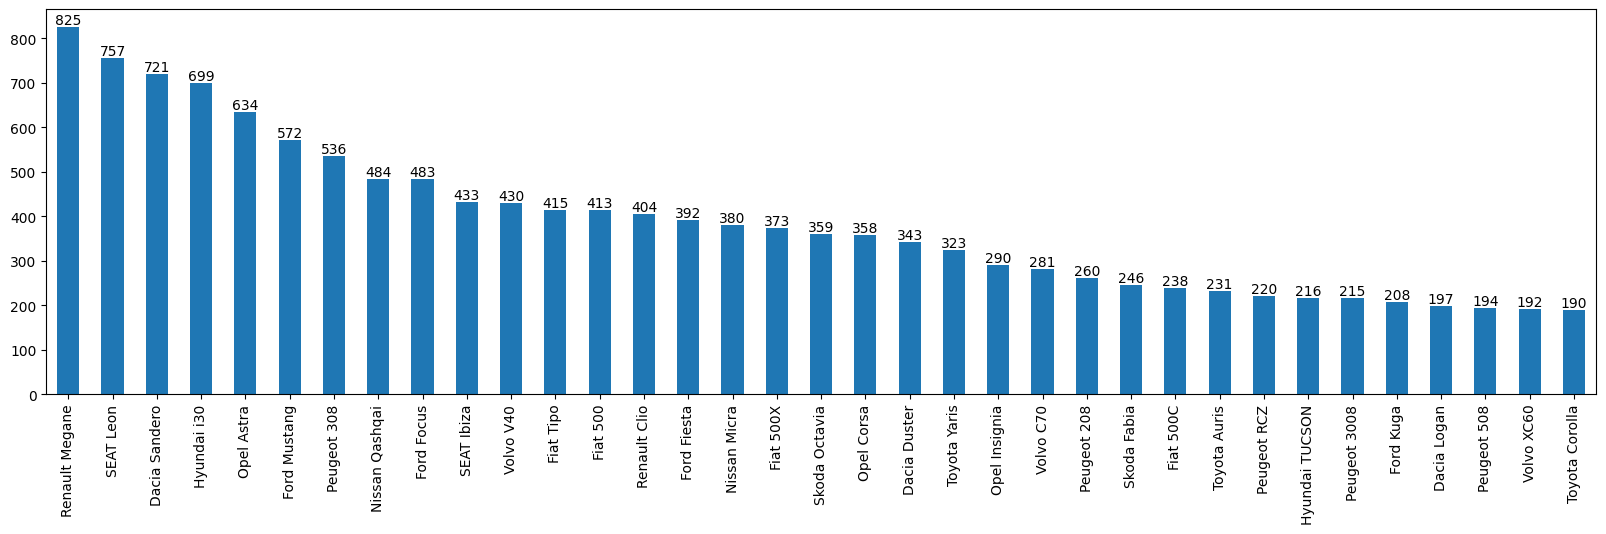

In [31]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see the top 35 models with the most observations in our data and their numbers.

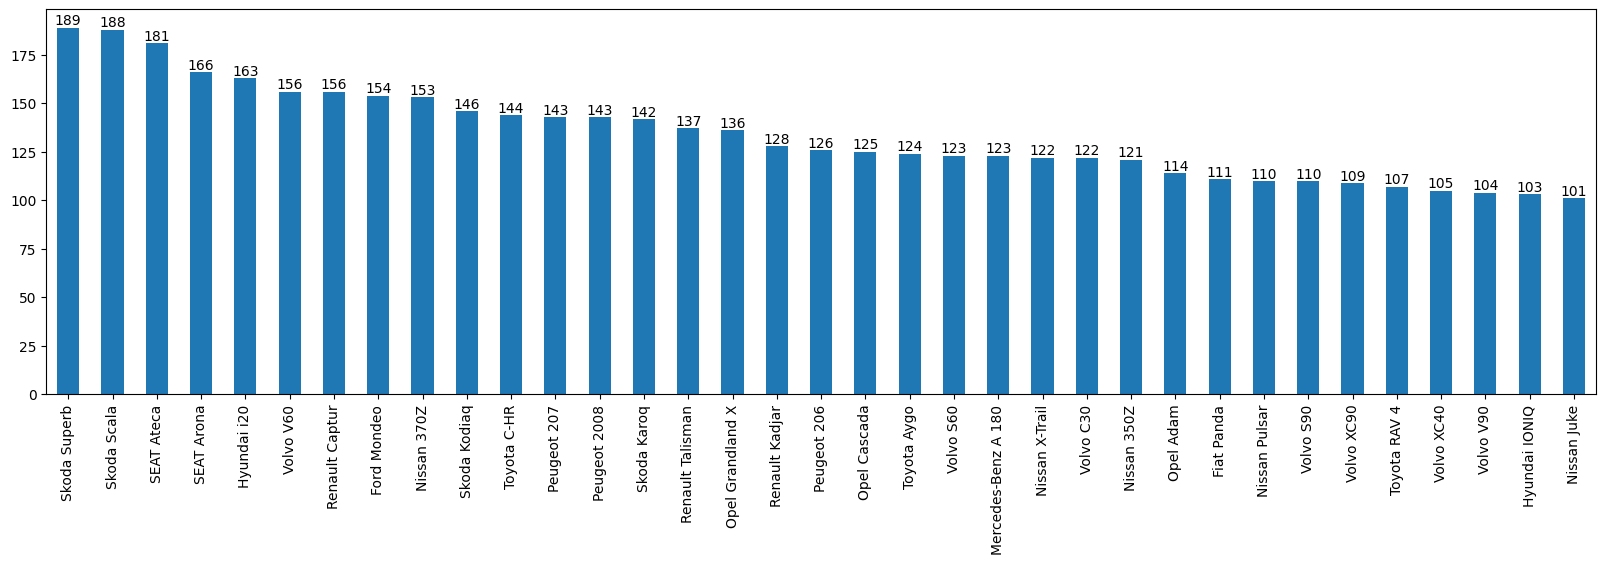

In [32]:
ax = df.make_model.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see 35 models and numbers with the least observations in our data.

In [33]:
df2 = df.copy()

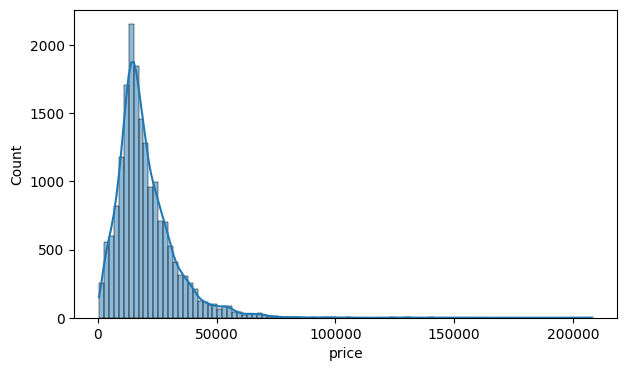

In [34]:
sns.histplot(df.price, bins=100, kde=True);

# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data with histplot.
# Let's not forget that outlier for ML means that the data of a group or groups in our data is insufficient for training.
# By looking at the image below, we see that the number of vehicles over 70.000 EURO is very low.
# Based on this image, we can evaluate that the number of vehicles over 70 thousand EURO may be insufficient for training.
# However, we cannot understand whether it is inadequate or not without training.
# We should decide by both dropping the observations that we consider as outliers and
# comparing the scores by doing the training without dropping them.

# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [35]:
skew(df.price)

2.473903804317343

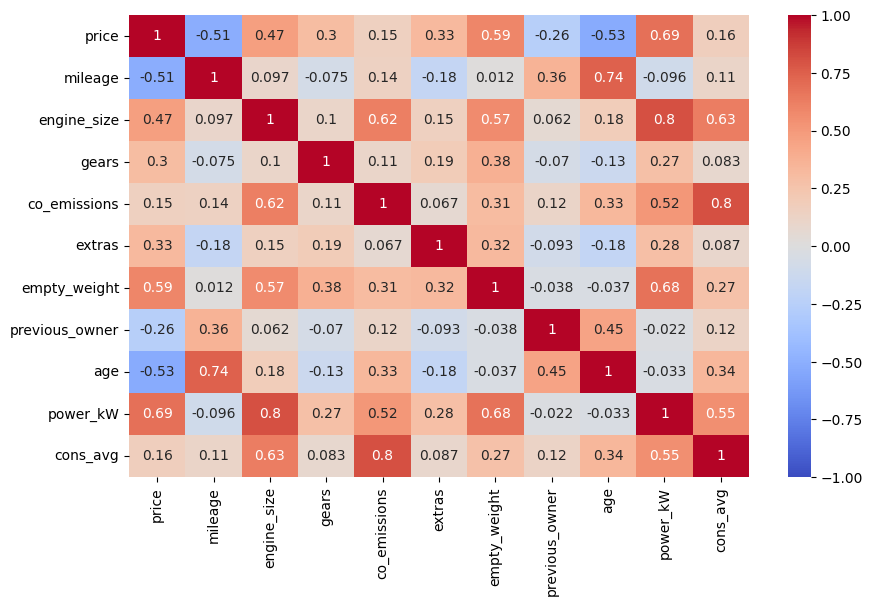

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

## multicollinearity control

In [37]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

False

### VIF (Variance Inflation Factor) Score for Multicolliniearity

In [38]:
# conda install -c anaconda statsmodels
# !pip install statsmodels

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
df_numeric = df.select_dtypes(include ="number")
X_vif = df_numeric.drop(columns='price')
X_vif.head()

mileage  engine_size  gears  co_emissions  extras  empty_weight  \
0  27150.000     1461.000  6.000       120.000       5      1330.000   
1 157500.000     1991.000  6.000       138.000       6      1295.000   
2  21734.000     1461.000  7.000        99.500       1      1445.000   
3 172700.000     1461.000  7.000        99.500       1      1425.000   
4  18989.000     1461.000  7.000        99.500       1      1455.000   

   previous_owner    age  power_kW  cons_avg  
0           2.000  2.000    85.000     4.500  
1           2.000 12.000    80.000     5.200  
2           2.000  2.000    85.000     3.900  
3           3.000  4.000    80.000     3.700  
4           2.000  2.000    85.000     3.900

In [41]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns
df_vif

features
0         mileage
1     engine_size
2           gears
3    co_emissions
4          extras
5    empty_weight
6  previous_owner
7             age
8        power_kW
9        cons_avg

In [42]:
variance_inflation_factor(X_vif.values, 0)

# Returns the VIF score of the relationship between the mileage feature at the 0th index of the "X_vif" and other features.

5.471118337441996

In [43]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [44]:
df_vif

#check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

# The features engine_size, gears, co_emissions, empty_weight, power_kW, and cons_avg have a serious multicollinearity
# problem with other features. In this context, it is necessary to use one of the regularization models for accurate
# feature selection.

features    VIF
0         mileage  5.471
1     engine_size 25.196
2           gears 21.675
3    co_emissions 23.505
4          extras  2.781
5    empty_weight 38.758
6  previous_owner  4.799
7             age  6.880
8        power_kW 17.868
9        cons_avg 24.706

## Outliers in Price Column

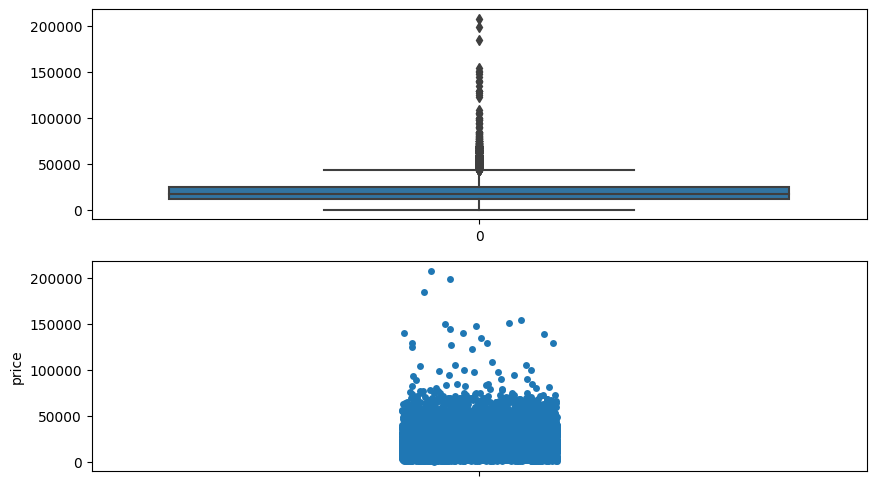

In [45]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution
# of categorical data. Although boxplot treats cars priced at 50 thousand EURO and above as outliers,
# stripplot tells us that the number of cars priced at 50 thousand EURO and around is not very few.
# But as we said above, our evaluation is not for the data in general. We will do it according to
# the groups in the data (Opel Astra, Ford Fiesta, Volvo S60 etc.).

In [46]:
#conda install -c anaconda ipywidgets

In [47]:
df[df.make_model=="Volvo V60"]

make_model     price      body_type            type warranty    mileage  \
17606  Volvo V60 10990.000  Station wagon            Used       No 239760.000   
17607  Volvo V60 43900.000  Station wagon            Used       No  92700.000   
17610  Volvo V60 42960.000  Station wagon            Used       No  63054.000   
17611  Volvo V60 10900.000  Station wagon            Used       No 172000.000   
17612  Volvo V60 27490.000  Station wagon            Used      Yes  94358.000   
17614  Volvo V60 32990.000  Station wagon            Used       No  67500.000   
17615  Volvo V60 38990.000  Station wagon            Used       No  52147.000   
17616  Volvo V60 33920.000  Station wagon            Used       No  78211.000   
17617  Volvo V60 20350.000  Station wagon            Used       No  81398.000   
17618  Volvo V60 17990.000  Station wagon            Used      Yes 139803.000   
17619  Volvo V60 38990.000  Station wagon            Used       No  69000.000   
17621  Volvo V60 49940.000  Station wagon   Demonstration      Yes  21000.000   
17622  Volvo V60 33999.000  Station wagon            Used      Yes  28400.000   
17623  Volvo V60 26900.000  Station wagon            Used       No 105000.000   
17625  Volvo V60 46880.000  Station wagon            Used      Yes  21946.000   
17626  Volvo V60 47450.000  Station wagon            Used       No  16714.000   
17627  Volvo V60 31990.000  Station wagon            Used      Yes  95689.000   
17628  Volvo V60 35940.000  Station wagon            Used      Yes  89759.000   
17629  Volvo V60 26950.000  Station wagon            Used       No  46990.000   
17630  Volvo V60 44500.000  Station wagon            Used      Yes   8500.000   
17631  Volvo V60 53990.000  Station wagon   Demonstration      Yes  54034.000   
17633  Volvo V60 18990.000  Station wagon            Used       No 191900.000   
17634  Volvo V60 46980.000  Station wagon            Used      Yes  18846.000   
17635  Volvo V60 22990.000  Station wagon            Used      Yes 111332.000   
17636  Volvo V60 29775.000  Station wagon            Used       No 104900.000   
17637  Volvo V60 23700.000  Station wagon            Used       No  88600.000   
17638  Volvo V60 12250.000  Station wagon            Used      Yes 120752.000   
17641  Volvo V60 36400.000  Station wagon            Used       No  25600.000   
17643  Volvo V60 35960.000  Station wagon            Used      Yes  31588.000   
17644  Volvo V60 26500.000  Station wagon            Used      Yes  74871.000   
17645  Volvo V60 34960.000  Station wagon            Used      Yes  49445.000   
17646  Volvo V60 28330.000  Station wagon            Used       No  48438.000   
17652  Volvo V60 24700.000  Station wagon            Used       No  88600.000   
17653  Volvo V60 45660.000  Station wagon            Used      Yes  15197.000   
17654  Volvo V60 35440.000  Station wagon            Used      Yes  66864.000   
17655  Volvo V60 18990.000  Station wagon            Used      Yes 126603.000   
17657  Volvo V60 58889.000  Station wagon            Used       No  42000.000   
17659  Volvo V60 59780.000  Station wagon            Used       No   2287.000   
17663  Volvo V60  7890.000  Station wagon            Used      Yes 247015.000   
17664  Volvo V60 42450.000  Station wagon            Used      Yes  62914.000   
17666  Volvo V60 36400.000  Station wagon            Used      Yes  23300.000   
17668  Volvo V60 36500.000  Station wagon            Used      Yes  72200.000   
17669  Volvo V60 28990.000  Station wagon            Used      Yes  51662.000   
17671  Volvo V60 35960.000  Station wagon            Used      Yes  30246.000   
17673  Volvo V60 54890.000  Station wagon            Used       No  20394.000   
17676  Volvo V60 48900.000  Station wagon            Used       No   7727.000   
17678  Volvo V60 29950.000  Station wagon            Used       No 116550.000   
17681  Volvo V60 34770.000  Station wagon            Used      Yes  65546.000   
17682  Volvo V60 52900.000  Station w

interactive(children=(Dropdown(description='model', options=('Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra'…

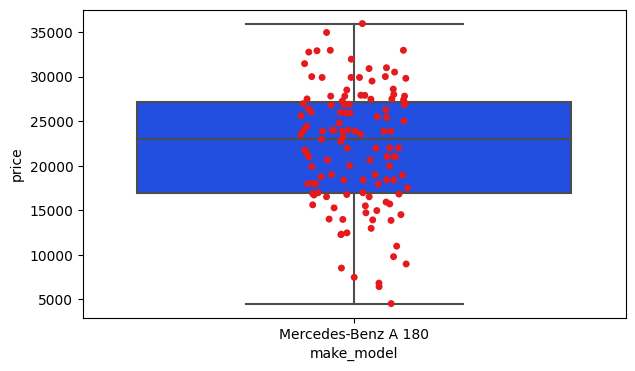

In [48]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='bright')

    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='Set1')
model = df.make_model.unique()
interact(box_strip, model=model);

# This code defines the function to plot an interactive boxplot and stripplot using the ipywidgets and seaborn libraries.
# The function superimposes the boxplot and stripplot graph showing the prices of different car models covered by the data.
# The interact() function allows the box_strip function to run by selecting the user through the interface.
# This selection determines the car model that will be used to draw the graph.

In [49]:
df.make_model.unique()

# unique groups in our data

array(['Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra', 'Opel Adam',
       'Opel Insignia', 'Opel Cascada', 'Opel Grandland X',
       'Renault Megane', 'Renault Clio', 'Renault Captur',
       'Renault Talisman', 'Renault Kadjar', 'Peugeot 308', 'Peugeot 206',
       'Peugeot 208', 'Peugeot 207', 'Peugeot 3008', 'Peugeot 508',
       'Peugeot RCZ', 'Peugeot 2008', 'Fiat 500', 'Fiat Tipo',
       'Fiat 500X', 'Fiat Panda', 'Fiat 500C', 'SEAT Leon', 'SEAT Ibiza',
       'SEAT Arona', 'SEAT Ateca', 'Skoda Octavia', 'Skoda Scala',
       'Skoda Fabia', 'Skoda Superb', 'Skoda Kodiaq', 'Skoda Karoq',
       'Dacia Sandero', 'Dacia Logan', 'Dacia Duster', 'Toyota Yaris',
       'Toyota Aygo', 'Toyota Corolla', 'Toyota Auris', 'Toyota C-HR',
       'Toyota RAV 4', 'Nissan Micra', 'Nissan Qashqai', 'Nissan Juke',
       'Nissan Pulsar', 'Nissan 370Z', 'Nissan 350Z', 'Nissan X-Trail',
       'Ford Fiesta', 'Ford Focus', 'Ford Mondeo', 'Ford Kuga',
       'Ford Mustang', 'Hyundai i30', 'Hyund

In [50]:
df[df["make_model"]== "Mercedes-Benz A 180"]["price"]

# Prices of Mercedes-Benz A 180s. We will try to determine the outlier values for each car using this code.

0     24400.000
1      7450.000
2     29800.000
3     21000.000
4     26800.000
5     32900.000
6     21000.000
7     32950.000
8     18390.000
9     25900.000
10    25400.000
11    29900.000
12    14490.000
13    20630.000
14     8490.000
15    23850.000
16    29900.000
17    25900.000
18    16700.000
19    23850.000
20    27460.000
21    20630.000
22    21000.000
23    29900.000
24    25600.000
25    26850.000
26    25990.000
27    27800.000
28    29999.000
29    27900.000
30    27490.000
31    24780.000
32     9770.000
33    23850.000
34    31950.000
35    25000.000
36    14700.000
37     8950.000
38    10950.000
39    16750.000
40    12950.000
41    12445.000
42    14945.000
43    16950.000
44    19950.000
45     6400.000
46    13990.000
47    23990.000
48    16800.000
49    23990.000
50    27800.000
51    26850.000
52    31450.000
53    17944.000
54    23536.000
55    12245.000
56    27800.000
57    16945.000
58    26980.000
59    18945.000
60    22950.000
61    12295.000
62    27

In [51]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Mercedes-Benz A 180      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Corsa               : 4 ,    The rate of outliers : 0.011
 The count of outlier for Opel Astra               : 10,    The rate of outliers : 0.016
 The count of outlier for Opel Adam                : 1 ,    The rate of outliers : 0.009
 The count of outlier for Opel Insignia            : 19,    The rate of outliers : 0.066
 The count of outlier for Opel Cascada             : 1 ,    The rate of outliers : 0.008
 The count of outlier for Opel Grandland X         : 1 ,    The rate of outliers : 0.007
 The count of outlier for Renault Megane           : 38,    The rate of outliers : 0.046
 The count of outlier for Renault Clio             : 8 ,    The rate of outliers : 0.02
 The count of outlier for Renault Captur           : 0 ,    The rate of outliers : 0.0
 The count of outlier for Renault Talisman         : 5 ,    The rate of outliers : 0.036
 The count of outlier for 

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### OneHotEncoder

#### Example

In [52]:
import sklearn
sklearn.__version__


'1.2.2'

In [53]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

col   y
0    bad   1
1  worst   2
2   good   3
3   good   4
4    bad   5
5    bed   6
6   good   7
7   good   8
8    bad   9
9    car  10

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [55]:
X_train

col
0    bad
1  worst
2   good
3   good
4    bad
5    bed
6   good

In [56]:
X_test

col
7  good
8   bad
9   car

In [57]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas") # sparse depricated if u use >=1.2 version. instead use sparse_output


# OneHotEncoder converts categorical features into dummies 0 and 1 features. If we want our model to treat
# all unique values under the categorical feature equally, we convert our categorical data to 0 and 1 using
# the onehotencoder conversion algorithm. We could also use the get_dummies() function for this conversion,
# but since applying get_dummies() to all data and then separating the data into train and test sets will
# cause data leakege, categorical observations for the data we prepared for ML models dummies features must be
# done with the onehotencoder conversion algorithm.

# However, when converting to categorical data, the following should not be forgotten:
# if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.)
# among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.

# Conversion of categorical data to dummies features is done according to the unique categorical data in
# the train set where the fit operation is performed. With the handle_unknown = "ignore" parameter,
# all categorical data passed in the test set and not in the train set are converted to 0.
# The default for this parameter is handle_unknown = "error". If the handle_unknown parameter remains at
# its default value, the onehotencoder algorithm will fail for an observation that is in the test set but
# not in the train set.

# In sklearn 1.2 versions, with the set_output(transform="pandas") code,
# it transforms the outputs converted into array after conversion into a dataframe
# with the feature names of the data to which it is fitted.

In [58]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made
# according to the unique observations in the train set.

col_bad  col_bed  col_good  col_worst
0    1.000    0.000     0.000      0.000
1    0.000    0.000     0.000      1.000
2    0.000    0.000     1.000      0.000
3    0.000    0.000     1.000      0.000
4    1.000    0.000     0.000      0.000
5    0.000    1.000     0.000      0.000
6    0.000    0.000     1.000      0.000

In [59]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1,
# while the non-observations (car) are converted to 0.

col_bad  col_bed  col_good  col_worst
7    0.000    0.000     1.000      0.000
8    1.000    0.000     0.000      0.000
9    0.000    0.000     0.000      0.000

### OrdinalEncoder

#### Example

In [60]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

col   y
0    bad   1
1  worst   2
2   good   3
3   good   4
4    bad   5
5   good   6
6   good   7
7    bad   8
8   ugly   9
9  worst  10

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [62]:
X_train

col
0    bad
1  worst
2   good
3   good
4    bad
5   good

In [63]:
X_test

col
6   good
7    bad
8   ugly
9  worst

In [64]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [65]:
enc_2.fit_transform(X_train)

col
0 1.000
1 0.000
2 2.000
3 2.000
4 1.000
5 2.000

In [66]:
enc_2.transform(X_test)

col
6  2.000
7  1.000
8 -1.000
9  0.000

### Train | Test Split

In [67]:
X= df.drop(columns="price")
y= df.price

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting Object Features into Numerical Features Using Make Column Transformer

In [69]:
df.select_dtypes(include="object").head(1)

make_model body_type  type warranty gearbox fuel_type  seller  \
0  Mercedes-Benz A 180   Compact  Used      Yes  Manual    Diesel  Dealer   

  drivetrain full_service_history         upholstery energy_efficiency_class  \
0      Front                   No  Part/Full Leather             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   

  safety_&_security_Package  
0    Safety Premium Package

In [70]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the non-transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [72]:
X_train.head()

make_model      body_type  type warranty    mileage    gearbox  \
16734       Volvo V40        Compact  Used      Yes  98027.000  Automatic   
14781     Ford Mondeo  Station wagon  Used      Yes  17195.000  Automatic   
2414   Renault Megane          Coupe  Used       No 225000.000     Manual   
1430       Opel Astra          Sedan  Used       No  62807.000  Automatic   
1512        Opel Adam          Sedan  Used      Yes  60750.000     Manual   

      fuel_type          seller  engine_size  gears  co_emissions drivetrain  \
16734    Diesel          Dealer     1560.000  6.000        89.000      Front   
14781    Diesel          Dealer     1995.000  8.000       136.000        4WD   
2414    Benzine  Private seller     1998.000  6.000       178.000      Front   
1430    Benzine          Dealer     1364.000  8.000       157.000      Front   
1512    Benzine          Dealer     1398.000  5.000         0.000      Front   

       extras  empty_weight full_service_history         upholstery  \
16734       1      1472.000                   No  Part/Full Leather   
14781       7      1826.000                  Yes  Part/Full Leather   
2414        6      1395.000                   No  Part/Full Leather   
1430        4      1280.000                  Yes              Cloth   
1512        9      1120.000                  Yes              Cloth   

       previous_owner energy_efficiency_class    age  power_kW  cons_avg  \
16734           3.000               efficient  7.000    84.000     3.900   
14781           1.000               efficient  1.000   140.000     5.200   
2414            1.000               efficient 13.000   132.000     7.600   
1430            4.000               efficient  8.000   103.000     6.700   
1512            1.000             unefficient  3.000    74.000     0.000   

      comfort_&_convenience_Package entertainment_&_media_Package  \
16734                      Standard                      Standard   
14781                       Premium                          Plus   
2414                       Standard                      Standard   
1430                        Premium                      Standard   
1512                        Premium                          Plus   

      safety_&_security_Package  
16734    Safety Premium Package  
14781    Safety Premium Package  
2414     Safety Premium Package  
1430     Safety Premium Package  
1512     Safety Premium Package

In [73]:
X_test.head()

make_model         body_type  type warranty   mileage    gearbox  \
15071      Ford Focus             Sedan  Used      Yes 27532.000     Manual   
10999     Toyota Aygo           Compact  Used      Yes 31167.000     Manual   
14000    Ford Mustang       Convertible  Used       No 33800.000  Automatic   
15766  Hyundai TUCSON  Off-Road/Pick-up  Used      Yes 34850.000  Automatic   
4291     Peugeot 3008  Off-Road/Pick-up  Used       No 57430.000  Automatic   

      fuel_type          seller  engine_size  gears  co_emissions drivetrain  \
15071    Diesel          Dealer     1500.000  6.000       109.000      Front   
10999   Benzine          Dealer      998.000  5.000        93.000      Front   
14000   Benzine  Private seller     5083.000  6.000       273.000       Rear   
15766    Diesel          Dealer     1600.000  6.000       129.000      Front   
4291     Diesel          Dealer     1997.000  8.000       129.000      Front   

       extras  empty_weight full_service_history         upholstery  \
15071       8      1280.000                   No              Cloth   
10999       4       985.000                   No              Cloth   
14000       9      1893.000                  Yes  Part/Full Leather   
15766       1      1425.000                   No              Cloth   
4291       15      1555.000                  Yes  Part/Full Leather   

       previous_owner energy_efficiency_class   age  power_kW  cons_avg  \
15071           1.000               efficient 2.000    88.000     3.600   
10999           1.000               efficient 2.000    53.000     4.000   
14000           1.000             unefficient 4.000   310.000    12.500   
15766           1.000             unefficient 4.000   100.000     4.650   
4291            1.000               efficient 3.000   132.000     4.900   

      comfort_&_convenience_Package entertainment_&_media_Package  \
15071                       Premium                          Plus   
10999                      Standard                          Plus   
14000                      Standard                          Plus   
15766                      Standard                      Standard   
4291                        Premium                          Plus   

      safety_&_security_Package  
15071    Safety Premium Package  
10999    Safety Premium Package  
14000    Safety Premium Package  
15766    Safety Premium Package  
4291     Safety Premium Package

In [74]:
X_train.shape, X_test.shape

((14557, 24), (3640, 24))

In [75]:
column_trans.fit_transform(X_train).head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                    0.000                   0.000   
14781                    0.000                   0.000   
2414                     0.000                   0.000   
1430                     0.000                   0.000   
1512                     0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                     0.000                0.000                 0.000   
14781                     0.000                0.000                 0.000   
2414                      0.000                0.000                 0.000   
1430                      0.000                0.000                 0.000   
1512                      0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                 0.000                  0.000                 0.000   
14781                 0.000                  0.000                 0.000   
2414                  0.000                  0.000                 0.000   
1430                  0.000                  0.000                 0.000   
1512                  0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                   0.000                  0.000                 0.000   
14781                   0.000                  0.000                 0.000   
2414                    0.000                  0.000                 0.000   
1430                    0.000                  0.000                 0.000   
1512                    0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                   0.000                    0.000   
14781                   1.000                    0.000   
2414                    0.000                    0.000   
1430                    0.000                    0.000   
1512                    0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                     0.000                      0.000   
14781                     0.000                      0.000   
2414                      0.000                      0.000   
1430                      0.000                      0.000   
1512                      0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                   0.000                   0.000   
14781                   0.000                   0.000   
2414                    0.000                   0.000   
1430                    0.000                   0.000   
1512                    0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                           0.000                   0.000   
14781                           0.000                   0.000   
2414                            0.000                   0.000   
1430                            0.000                   0.000   
1512                            0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                   0.000                   0.000   
14781                   0.000                   0.000   
2414                    0.000                   0.000   
1430                    0.000                   0.000   
1512                    0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                    0.000                     0.000   
14781                    0.000                     0.000   
2414                     0.000                     0.000   
1430                     0.000                     0.000   
1512                     0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                      0.000        

In [76]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [77]:
X_train_trans.shape, X_test_trans.shape # 24 features --> 110 features

((14557, 110), (3640, 110))

In [78]:
X_train_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                    0.000                   0.000   
14781                    0.000                   0.000   
2414                     0.000                   0.000   
1430                     0.000                   0.000   
1512                     0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                     0.000                0.000                 0.000   
14781                     0.000                0.000                 0.000   
2414                      0.000                0.000                 0.000   
1430                      0.000                0.000                 0.000   
1512                      0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                 0.000                  0.000                 0.000   
14781                 0.000                  0.000                 0.000   
2414                  0.000                  0.000                 0.000   
1430                  0.000                  0.000                 0.000   
1512                  0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                   0.000                  0.000                 0.000   
14781                   0.000                  0.000                 0.000   
2414                    0.000                  0.000                 0.000   
1430                    0.000                  0.000                 0.000   
1512                    0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                   0.000                    0.000   
14781                   1.000                    0.000   
2414                    0.000                    0.000   
1430                    0.000                    0.000   
1512                    0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                     0.000                      0.000   
14781                     0.000                      0.000   
2414                      0.000                      0.000   
1430                      0.000                      0.000   
1512                      0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                   0.000                   0.000   
14781                   0.000                   0.000   
2414                    0.000                   0.000   
1430                    0.000                   0.000   
1512                    0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                           0.000                   0.000   
14781                           0.000                   0.000   
2414                            0.000                   0.000   
1430                            0.000                   0.000   
1512                            0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                   0.000                   0.000   
14781                   0.000                   0.000   
2414                    0.000                   0.000   
1430                    0.000                   0.000   
1512                    0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                    0.000                     0.000   
14781                    0.000                     0.000   
2414                     0.000                     0.000   
1430                     0.000                     0.000   
1512                     0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                      0.000        

In [79]:
X_test_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
15071                    0.000                   0.000   
10999                    0.000                   0.000   
14000                    0.000                   0.000   
15766                    0.000                   0.000   
4291                     0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
15071                     0.000                0.000                 0.000   
10999                     0.000                0.000                 0.000   
14000                     0.000                0.000                 0.000   
15766                     0.000                0.000                 0.000   
4291                      0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
15071                 0.000                  0.000                 0.000   
10999                 0.000                  0.000                 0.000   
14000                 0.000                  0.000                 0.000   
15766                 0.000                  0.000                 0.000   
4291                  0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
15071                   0.000                  1.000                 0.000   
10999                   0.000                  0.000                 0.000   
14000                   0.000                  0.000                 0.000   
15766                   0.000                  0.000                 0.000   
4291                    0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
15071                   0.000                    0.000   
10999                   0.000                    0.000   
14000                   0.000                    1.000   
15766                   0.000                    0.000   
4291                    0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
15071                     0.000                      0.000   
10999                     0.000                      0.000   
14000                     0.000                      0.000   
15766                     0.000                      1.000   
4291                      0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
15071                   0.000                   0.000   
10999                   0.000                   0.000   
14000                   0.000                   0.000   
15766                   0.000                   0.000   
4291                    0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
15071                           0.000                   0.000   
10999                           0.000                   0.000   
14000                           0.000                   0.000   
15766                           0.000                   0.000   
4291                            0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
15071                   0.000                   0.000   
10999                   0.000                   0.000   
14000                   0.000                   0.000   
15766                   0.000                   0.000   
4291                    0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
15071                    0.000                     0.000   
10999                    0.000                     0.000   
14000                    0.000                     0.000   
15766                    0.000                     0.000   
4291                     0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
15071                      0.000        

In [80]:
X_train_trans.join(y_train).corr()

make_model_Dacia Duster  \
make_model_Dacia Duster                                1.000   
make_model_Dacia Logan                                -0.014   
make_model_Dacia Sandero                              -0.028   
make_model_Fiat 500                                   -0.021   
make_model_Fiat 500C                                  -0.016   
make_model_Fiat 500X                                  -0.020   
make_model_Fiat Panda                                 -0.011   
make_model_Fiat Tipo                                  -0.021   
make_model_Ford Fiesta                                -0.021   
make_model_Ford Focus                                 -0.023   
make_model_Ford Kuga                                  -0.015   
make_model_Ford Mondeo                                -0.013   
make_model_Ford Mustang                               -0.025   
make_model_Hyundai IONIQ                              -0.011   
make_model_Hyundai TUCSON                             -0.015   
make_model_Hyundai i20                                -0.013   
make_model_Hyundai i30                                -0.027   
make_model_Mercedes-Benz A 180                        -0.011   
make_model_Nissan 350Z                                -0.011   
make_model_Nissan 370Z                                -0.012   
make_model_Nissan Juke                                -0.011   
make_model_Nissan Micra                               -0.020   
make_model_Nissan Pulsar                              -0.011   
make_model_Nissan Qashqai                             -0.023   
make_model_Nissan X-Trail                             -0.011   
make_model_Opel Adam                                  -0.011   
make_model_Opel Astra                                 -0.027   
make_model_Opel Cascada                               -0.012   
make_model_Opel Corsa                                 -0.019   
make_model_Opel Grandland X                           -0.012   
make_model_Opel Insignia                              -0.017   
make_model_Peugeot 2008                               -0.012   
make_model_Peugeot 206                                -0.012   
make_model_Peugeot 207                                -0.013   
make_model_Peugeot 208                                -0.017   
make_model_Peugeot 3008                               -0.015   
make_model_Peugeot 308                                -0.024   
make_model_Peugeot 508                                -0.014   
make_model_Peugeot RCZ                                -0.015   
make_model_Renault Captur                             -0.013   
make_model_Renault Clio                               -0.021   
make_model_Renault Kadjar                             -0.012   
make_model_Renault Megane                             -0.030   
make_model_Renault Talisman                           -0.012   
make_model_SEAT Arona                                 -0.013   
make_model_SEAT Ateca                                 -0.014   
make_model_SEAT Ibiza                                 -0.021   
make_model_SEAT Leon                                  -0.028   
make_model_Skoda Fabia                                -0.016   
make_model_Skoda Karoq                                -0.012   
make_model_Skoda Kodiaq                               -0.012   
make_model_Skoda Octavia                              -0.020   
make_model_Skoda Scala                                -0.014   
make_model_Skoda Superb                               -0.015   
make_model_Toyota Auris                               -0.015   
make_model_Toyota Aygo                                -0.011   
make_model_Toyota C-HR                                -0.012   
make_model_Toyota Corolla                             -0.014   
make_model_Toyota RAV 4                               -0.010   
make_model_Toyota Yaris                               -0.019   
make_model_Volvo C30                                  -0.011   
make_model_Volvo C70                                  -0.018   
make_

In [81]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

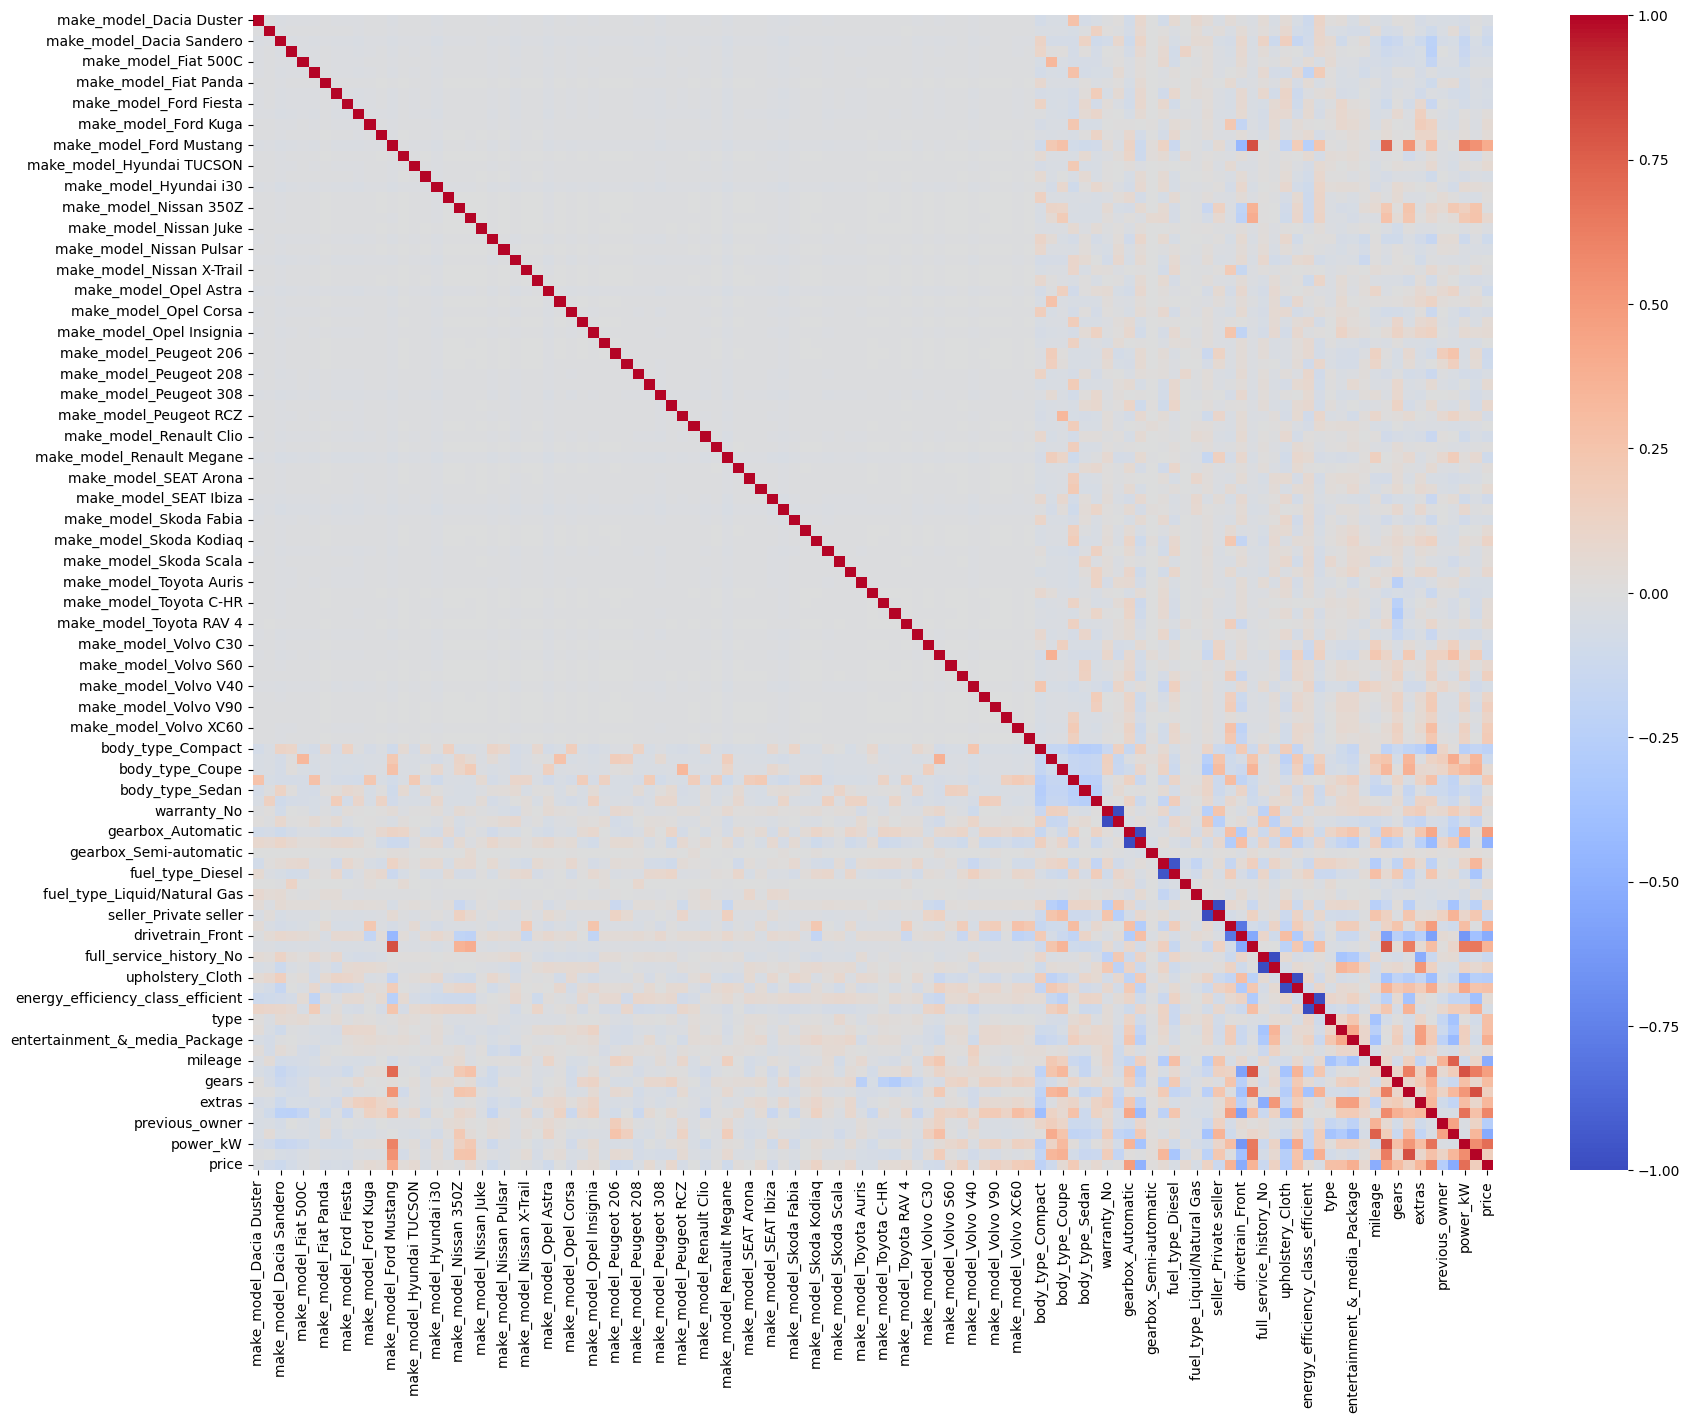

In [82]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

### Scaling

In [83]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [84]:
X_train_scaled.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                    0.000                   0.000   
14781                    0.000                   0.000   
2414                     0.000                   0.000   
1430                     0.000                   0.000   
1512                     0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                     0.000                0.000                 0.000   
14781                     0.000                0.000                 0.000   
2414                      0.000                0.000                 0.000   
1430                      0.000                0.000                 0.000   
1512                      0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                 0.000                  0.000                 0.000   
14781                 0.000                  0.000                 0.000   
2414                  0.000                  0.000                 0.000   
1430                  0.000                  0.000                 0.000   
1512                  0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                   0.000                  0.000                 0.000   
14781                   0.000                  0.000                 0.000   
2414                    0.000                  0.000                 0.000   
1430                    0.000                  0.000                 0.000   
1512                    0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                   0.000                    0.000   
14781                   1.000                    0.000   
2414                    0.000                    0.000   
1430                    0.000                    0.000   
1512                    0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                     0.000                      0.000   
14781                     0.000                      0.000   
2414                      0.000                      0.000   
1430                      0.000                      0.000   
1512                      0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                   0.000                   0.000   
14781                   0.000                   0.000   
2414                    0.000                   0.000   
1430                    0.000                   0.000   
1512                    0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                           0.000                   0.000   
14781                           0.000                   0.000   
2414                            0.000                   0.000   
1430                            0.000                   0.000   
1512                            0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                   0.000                   0.000   
14781                   0.000                   0.000   
2414                    0.000                   0.000   
1430                    0.000                   0.000   
1512                    0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                    0.000                     0.000   
14781                    0.000                     0.000   
2414                     0.000                     0.000   
1430                     0.000                     0.000   
1512                     0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                      0.000        

In [85]:
X_test_scaled.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
15071                    0.000                   0.000   
10999                    0.000                   0.000   
14000                    0.000                   0.000   
15766                    0.000                   0.000   
4291                     0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
15071                     0.000                0.000                 0.000   
10999                     0.000                0.000                 0.000   
14000                     0.000                0.000                 0.000   
15766                     0.000                0.000                 0.000   
4291                      0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
15071                 0.000                  0.000                 0.000   
10999                 0.000                  0.000                 0.000   
14000                 0.000                  0.000                 0.000   
15766                 0.000                  0.000                 0.000   
4291                  0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
15071                   0.000                  1.000                 0.000   
10999                   0.000                  0.000                 0.000   
14000                   0.000                  0.000                 0.000   
15766                   0.000                  0.000                 0.000   
4291                    0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
15071                   0.000                    0.000   
10999                   0.000                    0.000   
14000                   0.000                    1.000   
15766                   0.000                    0.000   
4291                    0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
15071                     0.000                      0.000   
10999                     0.000                      0.000   
14000                     0.000                      0.000   
15766                     0.000                      1.000   
4291                      0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
15071                   0.000                   0.000   
10999                   0.000                   0.000   
14000                   0.000                   0.000   
15766                   0.000                   0.000   
4291                    0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
15071                           0.000                   0.000   
10999                           0.000                   0.000   
14000                           0.000                   0.000   
15766                           0.000                   0.000   
4291                            0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
15071                   0.000                   0.000   
10999                   0.000                   0.000   
14000                   0.000                   0.000   
15766                   0.000                   0.000   
4291                    0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
15071                    0.000                     0.000   
10999                    0.000                     0.000   
14000                    0.000                     0.000   
15766                    0.000                     0.000   
4291                     0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
15071                      0.000        

## Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [86]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [87]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [88]:
pd.options.display.float_format = '{:.3f}'.format
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.832        0.831
mae      2852.537     2817.700
mse  27088140.231 24543044.437
rmse     5204.627     4954.094
mape        0.202        0.192

### Adjusted R2 Score

In [89]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [90]:
y_pred = lm.predict(X_test_scaled)

# We take our predictions (y_pred) from the model to use in the function we defined above.

In [91]:
adj_r2(y_test, y_pred, X_test_scaled)

# We obtain our score by giving the necessary parameters to the function.

0.8253308396056851

### Cross Validate

In [92]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True,
                        # return_indices=True
                       )


# As we learned in our previous lessons, we perform the overfiting control by comparing the train and
# validation scores we receive through cross validaition.

# return_indices=True, returns the index numbers of the train and validation data in each iteration

In [93]:
pd.DataFrame(scores)

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
0     0.795       0.065    0.863     0.828                     -2990.673   
1     0.769       0.051    0.850     0.829                     -2772.577   
2     0.454       0.016    0.841     0.830                     -2871.170   
3     0.605       0.009    0.846     0.830                     -2798.672   
4     0.224       0.027    0.844     0.830                     -2804.836   
5     0.206       0.011    0.831     0.831                     -2858.324   
6     0.277       0.015    0.791     0.836                     -3023.740   
7     0.215       0.011    0.848     0.830                     -2711.571   
8     0.251       0.013    0.790     0.837                     -3013.547   
9     0.263       0.022    0.809     0.834                     -2922.375   

   train_neg_mean_absolute_error  test_neg_mean_squared_error  \
0                      -2841.494                -23024044.396   
1                      -2881.374                -20034562.152   
2                      -2869.146                -23118474.500   
3                      -2865.781                -22189431.043   
4                      -2865.119                -22900993.448   
5                      -2856.513                -29435420.952   
6                      -2834.732                -38280710.800   
7                      -2879.271                -21181003.215   
8                      -2822.729                -43633394.078   
9                      -2841.893                -31275928.775   

   train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
0                 -27555605.546                         -4798.338   
1                 -27927306.130                         -4475.998   
2                 -27555587.058                         -4808.167   
3                 -27651802.208                         -4710.566   
4                 -27586245.015                         -4785.498   
5                 -26859272.800                         -5425.442   
6                 -25880108.735                         -6187.141   
7                 -27776391.049                         -4602.282   
8                 -25298477.785                         -6605.558   
9                 -26651913.312                         -5592.489   

   train_neg_root_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                          -5249.343                                   -0.217   
1                          -5284.629                                   -0.201   
2                          -5249.342                                   -0.216   
3                          -5258.498                                   -0.200   
4                          -5252.261                                   -0.198   
5                          -5182.593                                   -0.208   
6                          -5087.250                                   -0.209   
7                          -5270.331                                   -0.198   
8                          -5029.759                                   -0.199   
9                          -5162.549                                   -0.188   

   train_neg_mean_absolute_percentage_error  
0                                    -0.201  
1                                    -0.205  
2                                    -0.201  
3                                    -0.203  
4                                    -0.202  
5                                    -0.202  
6                                    -0.200  
7                                    -0.202  
8                                    -0.200  
9                                    -0.203

In [94]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

test_r2                                            0.831
train_r2                                           0.832
test_neg_mean_absolute_error                   -2876.748
train_neg_mean_absolute_error                  -2855.805
test_neg_mean_squared_error                -27507396.336
train_neg_mean_squared_error               -27074270.964
test_neg_root_mean_squared_error               -5199.148
train_neg_root_mean_squared_error              -5202.656
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

In [95]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.832        0.831
mae      2852.537     2817.700
mse  27088140.231 24543044.437
rmse     5204.627     4954.094
mape        0.202        0.192

### Prediction Error with Outliers

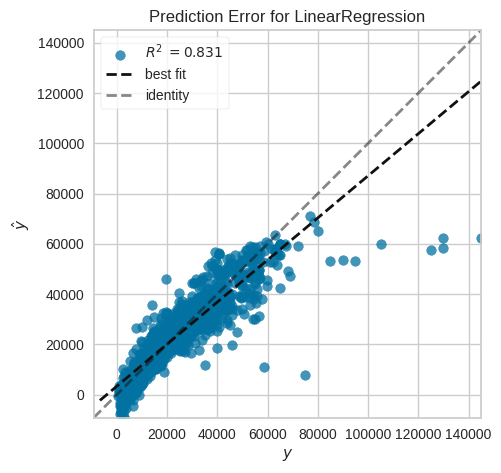

In [96]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# From prediciton error chart, we can see how good our model's predictions are. When we look at the image below,
# we can see that cars with prices of 70 thousand EURO and above are pulling our best fit line down.
# If I drop the very low-priced cars that I see from the data that break my scores,
# the cars with 70 thousand EURO and above, or the outlier-priced cars that I have determined on
# the basis of models from my data and retrain the model from this data, I can get better scores.

# We will continue to drop cars with very low prices and cars over 70.000 EURO in this notebook.

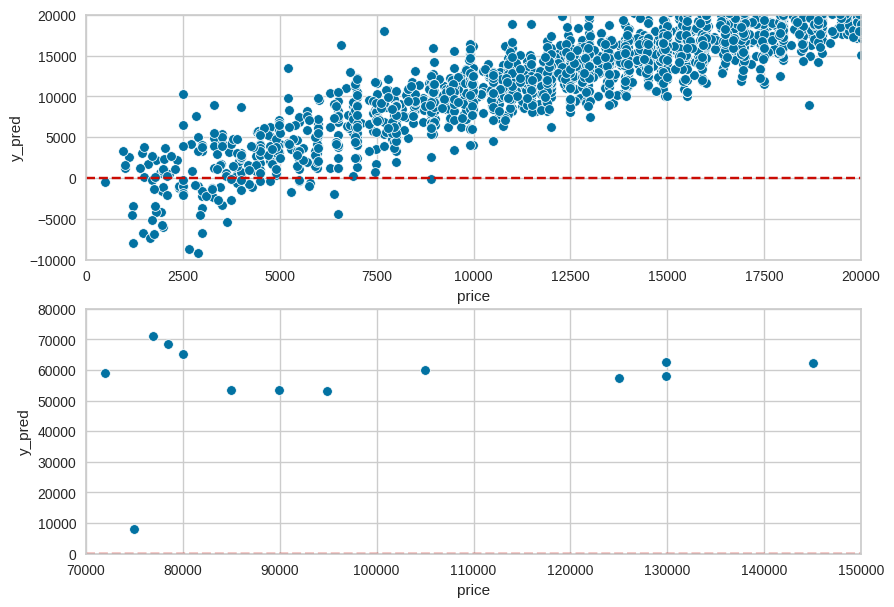

In [97]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

# We see that our model does not learn well about the car prices of 7500 EURO and below and over 70 thousand EURO.
# The question that immediately comes to our mind should be: What is the distribution of car prices below 7500 EURO
# and above 70 thousand EURO in the residual plot? We will look at the residual plot below and see
# if linear regression is a good choice for the determination of the car prices we mentioned.

### Residual Plot with Outliers

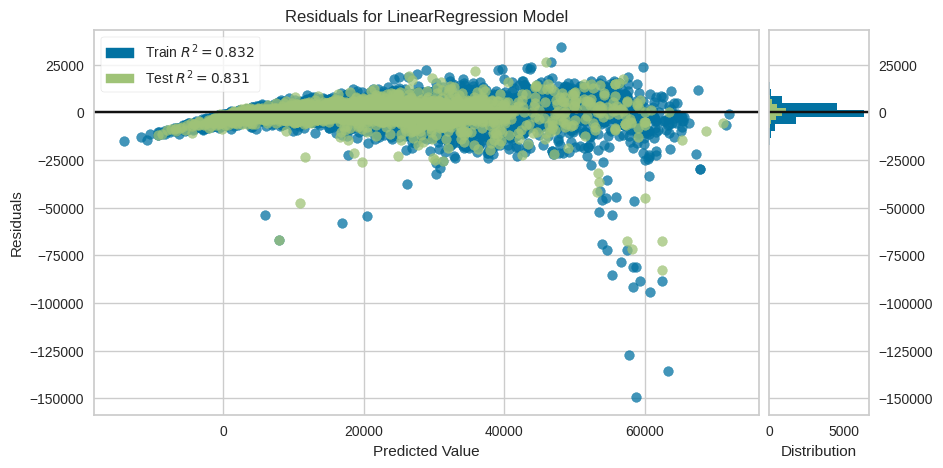

In [98]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

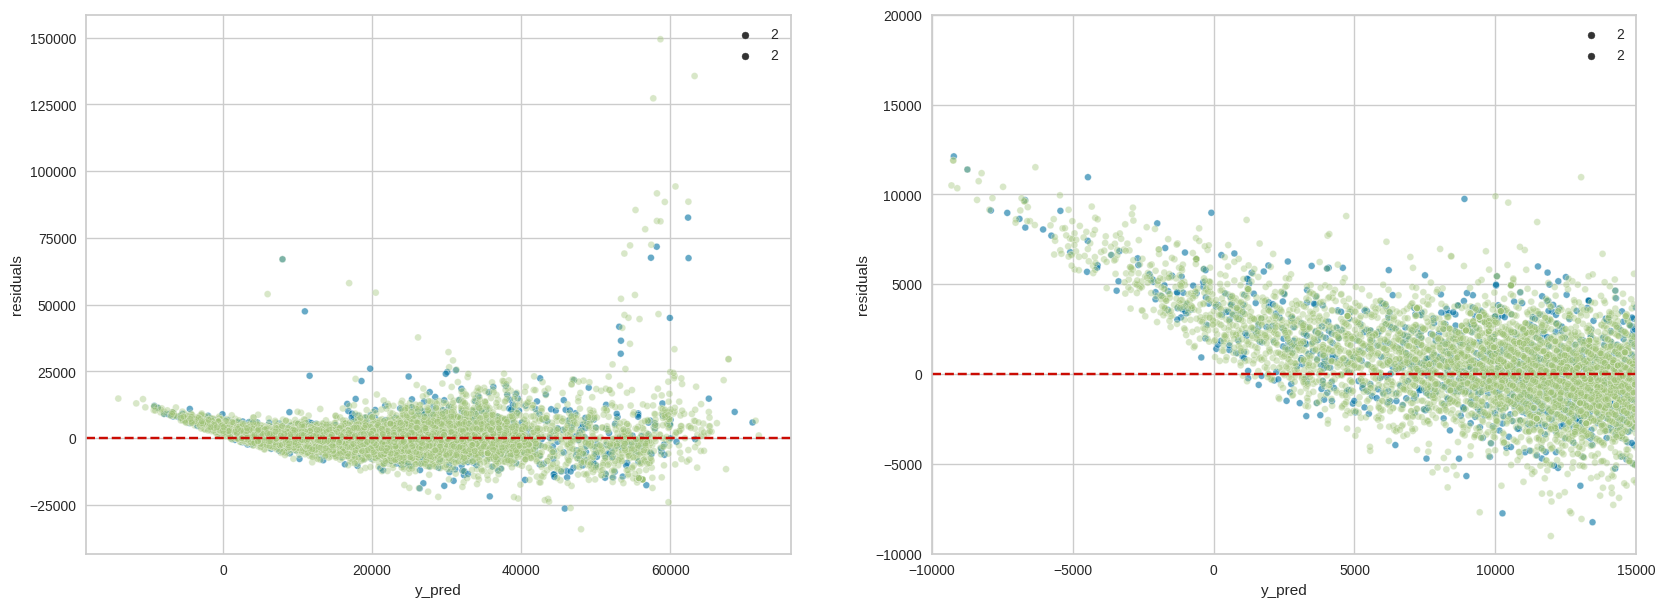

In [99]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();

# When we look at the residuals plot, we can see that the problem is that low-priced cars and high-priced cars
# that do not have a balanced distribution around the 0 axis disrupt the distribution in the residual plot.

# For this, we will drop the cars below 7500 EURO and above 70 thousand EURO,
# which the model made bad predictions above, from our data.
# Then we will observe our scores again.

## Filtering Data and Rebuilding The Model

In [100]:
df = df[(df.price > 7500)&(df.price <70000)]
df

make_model     price body_type            type warranty  \
0      Mercedes-Benz A 180 24400.000   Compact            Used      Yes   
2      Mercedes-Benz A 180 29800.000   Compact            Used      Yes   
3      Mercedes-Benz A 180 21000.000   Compact            Used      Yes   
4      Mercedes-Benz A 180 26800.000   Compact            Used      Yes   
5      Mercedes-Benz A 180 32900.000   Compact  Pre-registered      Yes   
...                    ...       ...       ...             ...      ...   
18190            Volvo S90 27190.000     Sedan            Used      Yes   
18191            Volvo S90 27190.000     Sedan            Used      Yes   
18192            Volvo V40 13000.000     Sedan            Used       No   
18194            Volvo S90 37600.000     Sedan            Used      Yes   
18196            Volvo S90 29900.000     Sedan            Used      Yes   

         mileage    gearbox fuel_type          seller  engine_size  gears  \
0      27150.000     Manual    Diesel          Dealer     1461.000  6.000   
2      21734.000  Automatic    Diesel          Dealer     1461.000  7.000   
3     172700.000  Automatic    Diesel          Dealer     1461.000  7.000   
4      18989.000  Automatic    Diesel          Dealer     1461.000  7.000   
5         25.000     Manual   Benzine          Dealer     1332.000  6.000   
...          ...        ...       ...             ...          ...    ...   
18190  93757.000  Automatic    Diesel          Dealer     1969.000  8.000   
18191  93757.000  Automatic    Diesel          Dealer     1969.000  8.000   
18192 114000.000     Manual    Diesel  Private seller     1969.000  6.000   
18194  40345.000  Automatic    Diesel          Dealer     1969.000  8.000   
18196  94343.000  Automatic   Benzine          Dealer     1969.000  8.000   

       co_emissions drivetrain  extras  empty_weight full_service_history  \
0           120.000      Front       5      1330.000                   No   
2            99.500      Front       1      1445.000                   No   
3            99.500      Front       1      1425.000                   No   
4            99.500      Front       1      1455.000                   No   
5           126.000      Front       1      1350.000                   No   
...             ...        ...     ...           ...                  ...   
18190       127.000      Front       1      1683.000                   No   
18191       127.000      Front       1      1683.000                   No   
18192        94.000      Front       9      1532.000                  Yes   
18194       127.000        4WD       1      2077.000                   No   
18196       149.000        4WD       2      1617.000                  Yes   

              upholstery  previous_owner energy_efficiency_class   age  \
0      Part/Full Leather           2.000             unefficient 2.000   
2                  Cloth           2.000             unefficient 2.000   
3                  Cloth           3.000             unefficient 4.000   
4                  Cloth           2.000             unefficient 2.000   
5                  Cloth           1.000             unefficient 1.000   
...                  ...             ...                     ...   ...   
18190  Part/Full Leather           1.000               efficient 4.000   
18191  Part/Full Leather           1.000               efficient 4.000   
18192              Cloth           1.000               efficient 4.000   
18194  Part/Full Leather           2.000               efficient 3.000   
18196  Part/Full Leather           1.000               efficient 5.000   

       power_kW  cons_avg comfort_&_convenience_Package  \
0        85.000     4.500                      Standard   
2        85.000     3.900                      Standard   
3        80.000     3.700                      Standard   
4        85.000     3.900                      Standard   
5       100.000     0.000                      Standard   
...         ...       

In [101]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [102]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [103]:
X_train.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
7674                     0.000                   0.000   
13227                    0.000                   0.000   
8532                     0.000                   0.000   
4458                     0.000                   0.000   
15437                    0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
7674                      0.000                0.000                 0.000   
13227                     0.000                0.000                 0.000   
8532                      0.000                0.000                 0.000   
4458                      0.000                0.000                 0.000   
15437                     0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
7674                  0.000                  0.000                 0.000   
13227                 0.000                  0.000                 0.000   
8532                  0.000                  0.000                 0.000   
4458                  0.000                  0.000                 0.000   
15437                 0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
7674                    0.000                  0.000                 0.000   
13227                   0.000                  0.000                 0.000   
8532                    0.000                  0.000                 0.000   
4458                    0.000                  0.000                 0.000   
15437                   0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
7674                    0.000                    0.000   
13227                   0.000                    0.000   
8532                    0.000                    0.000   
4458                    0.000                    0.000   
15437                   0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
7674                      0.000                      0.000   
13227                     0.000                      0.000   
8532                      0.000                      0.000   
4458                      0.000                      0.000   
15437                     0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
7674                    0.000                   0.000   
13227                   0.000                   0.000   
8532                    0.000                   0.000   
4458                    0.000                   0.000   
15437                   0.000                   1.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
7674                            0.000                   0.000   
13227                           0.000                   0.000   
8532                            0.000                   0.000   
4458                            0.000                   0.000   
15437                           0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
7674                    0.000                   0.000   
13227                   0.000                   0.000   
8532                    0.000                   0.000   
4458                    0.000                   0.000   
15437                   0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
7674                     0.000                     0.000   
13227                    1.000                     0.000   
8532                     0.000                     0.000   
4458                     0.000                     0.000   
15437                    0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
7674                       0.000        

In [104]:
X_test.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
5621                     0.000                   0.000   
14584                    0.000                   0.000   
8666                     0.000                   0.000   
15746                    0.000                   0.000   
10258                    1.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
5621                      0.000                0.000                 1.000   
14584                     0.000                0.000                 0.000   
8666                      0.000                0.000                 0.000   
15746                     0.000                0.000                 0.000   
10258                     0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
5621                  0.000                  0.000                 0.000   
14584                 0.000                  0.000                 0.000   
8666                  0.000                  0.000                 0.000   
15746                 0.000                  0.000                 0.000   
10258                 0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
5621                    0.000                  0.000                 0.000   
14584                   0.000                  0.000                 1.000   
8666                    0.000                  0.000                 0.000   
15746                   0.000                  0.000                 0.000   
10258                   0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
5621                    0.000                    0.000   
14584                   0.000                    0.000   
8666                    0.000                    0.000   
15746                   0.000                    0.000   
10258                   0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
5621                      0.000                      0.000   
14584                     0.000                      0.000   
8666                      0.000                      0.000   
15746                     0.000                      1.000   
10258                     0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
5621                    0.000                   0.000   
14584                   0.000                   0.000   
8666                    0.000                   0.000   
15746                   0.000                   0.000   
10258                   0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
5621                            0.000                   0.000   
14584                           0.000                   0.000   
8666                            0.000                   0.000   
15746                           0.000                   0.000   
10258                           0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
5621                    0.000                   0.000   
14584                   0.000                   0.000   
8666                    0.000                   0.000   
15746                   0.000                   0.000   
10258                   0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
5621                     0.000                     0.000   
14584                    0.000                     0.000   
8666                     0.000                     0.000   
15746                    0.000                     0.000   
10258                    0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
5621                       0.000        

In [105]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.880        0.876
mae      2581.554     2495.546
mse  14166788.071 13463762.267
rmse     3763.879     3669.300
mape        0.131        0.131

### Prediction Error without Outliers

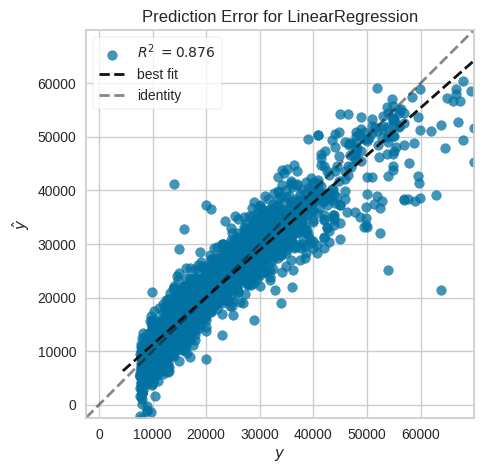

In [108]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

### Residual Plot without Outliers

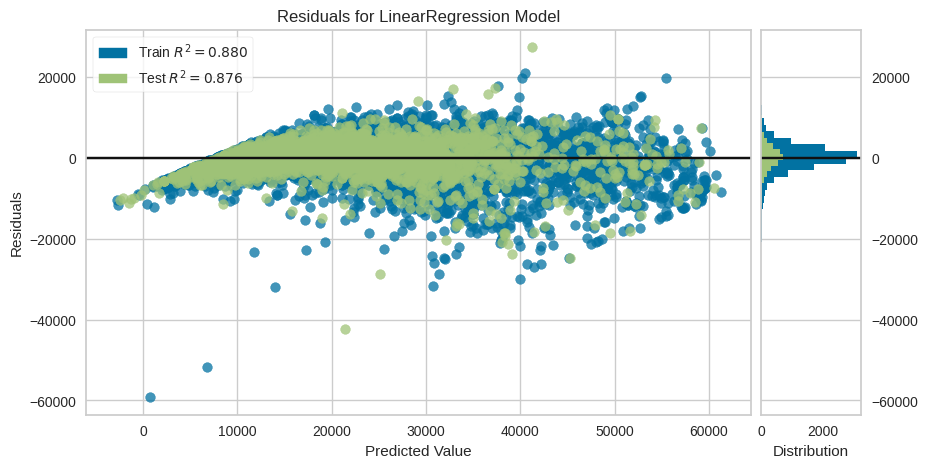

In [109]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# for cars priced at or around 7500 EURO, although our scores have improved
# still not suitable for linear regression.

In [110]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

# We are checking overfitting according to our new data.
# Since train and test scores and error rates are close, we can say there is no overfitting.

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2606.890
train_neg_mean_absolute_error                  -2583.369
test_neg_mean_squared_error                -14447190.847
train_neg_mean_squared_error               -14133491.020
test_neg_root_mean_squared_error               -3796.426
train_neg_root_mean_squared_error              -3759.397
test_neg_mean_absolute_percentage_error           -0.133
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

In [111]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# Since the test scores we will present to the customer and the validation scores we get from the CV are close
# to each other, we can say that the scores we get from the test (hold out) set are consistent scores.

train         test
R2          0.880        0.876
mae      2581.554     2495.546
mse  14166788.071 13463762.267
rmse     3763.879     3669.300
mape        0.131        0.131

In [112]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

# We assign the scores to the variables to compare the scores we get from the linear model.

In [113]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])
 # The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

# Dummy variable trap is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur as a result of deriving or extracting one argument from other arguments.

# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model.
# However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables),
# problems may arise with the accuracy of the model. This may also be reflected in the significantly
# higher correlations in the correlation matrix of the independent variables.

# Dummy variable trap may occur, especially when adding categorical variables to models.
# Categorical variables, such as "gender" or "country", are often converted to dummy variables
# when added to the model. This means, for example, creating two different dummy variables
# "male" and "female" for the "gender" variable. However, in this case, the addition of both variables
# to the model may cause problems as they are variables that can be derived from each other.
# This occurs when a dummy variable can be derived from the sum of other dummy variables.

# In order to reduce the effect of the dummy variable trap, when transforming the unique categorical observations
# under each featura into dummies features, it can be eliminated by dropping 1 of these observations or
# applying regularization.

# The drop="first" parameter in the code OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"), cat_onehot)
# drops 1 unique categorical observation in each featur and is among the new dummies features.
# weakens the relationship. but drop="first" is not used when feature importance is to be made.
# Regularization is preferred.

Coef
make_model_Dacia Duster                  -2480773350183.511
make_model_Dacia Logan                   -2480773351819.728
make_model_Dacia Sandero                 -2480773352922.238
make_model_Fiat 500                      -2480773351328.902
make_model_Fiat 500C                     -2480773349483.647
make_model_Fiat 500X                     -2480773348634.667
make_model_Fiat Panda                    -2480773352058.219
make_model_Fiat Tipo                     -2480773351802.519
make_model_Ford Fiesta                   -2480773351352.659
make_model_Ford Focus                    -2480773349677.792
make_model_Ford Kuga                     -2480773348424.112
make_model_Ford Mondeo                   -2480773348448.205
make_model_Ford Mustang                  -2480773354399.480
make_model_Hyundai IONIQ                 -2480773348669.374
make_model_Hyundai TUCSON                -2480773345917.428
make_model_Hyundai i20                   -2480773351639.266
make_model_Hyundai i30                   -2480773350929.477
make_model_Mercedes-Benz A 180           -2480773343202.596
make_model_Nissan 350Z                   -2480773353695.273
make_model_Nissan 370Z                   -2480773357250.956
make_model_Nissan Juke                   -2480773349581.099
make_model_Nissan Micra                  -2480773352102.183
make_model_Nissan Pulsar                 -2480773350796.233
make_model_Nissan Qashqai                -2480773347164.500
make_model_Nissan X-Trail                -2480773347475.304
make_model_Opel Adam                     -2480773352825.396
make_model_Opel Astra                    -2480773351764.109
make_model_Opel Cascada                  -2480773349537.898
make_model_Opel Corsa                    -2480773352772.465
make_model_Opel Grandland X              -2480773348568.703
make_model_Opel Insignia                 -2480773350210.403
make_model_Peugeot 2008                  -2480773347641.478
make_model_Peugeot 206                   -2480773343372.929
make_model_Peugeot 207                   -2480773349600.520
make_model_Peugeot 208                   -2480773350557.900
make_model_Peugeot 3008                  -2480773344855.808
make_model_Peugeot 308                   -2480773348664.320
make_model_Peugeot 508                   -2480773344760.180
make_model_Peugeot RCZ                   -2480773348608.294
make_model_Renault Captur                -2480773349080.522
make_model_Renault Clio                  -2480773350997.690
make_model_Renault Kadjar                -2480773348560.286
make_model_Renault Megane                -2480773349087.346
make_model_Renault Talisman              -2480773348791.355
make_model_SEAT Arona                    -2480773349218.910
make_model_SEAT Ateca                    -2480773346030.013
make_model_SEAT Ibiza                    -2480773351134.849
make_model_SEAT Leon                     -2480773350767.221
make_model_Skoda Fabia                   -2480773351264.645
make_model_Skoda Karoq                   -2480773343911.607
make_model_Skoda Kodiaq                  -2480773339715.985
make_model_Skoda Octavia                 -2480773348409.731
make_model_Skoda Scala                   -2480773350439.889
make_model_Skoda Superb                  -2480773345681.651
make_model_Toyota Auris                  -2480773349287.791
make_model_Toyota Aygo                   -2480773352708.212
make_model_Toyota C-HR                   -2480773347963.719
make_model_Toyota Corolla                -2480773349043.883
make_model_Toyota RAV 4                  -2480773344707.782
make_model_Toyota Yaris                  -2480773350061.662
make_model_Volvo C30                     -2480773347341.159
make_model_Volvo C70                     -2480773344533.839
make_model_Volvo S60                     -2480773343408.814
make_model_Volvo S90                     -2480773339590.881
make_model_Volvo V40                     -2480773349159.770
make_model_Volvo V60                     -2480773346487.631
make_model_Volvo V90               

## Pipeline

In [114]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [115]:
X_train.head()

make_model         body_type  type warranty   mileage    gearbox  \
7674       SEAT Leon     Station wagon  Used       No 35977.000  Automatic   
13227   Nissan Micra             Sedan  Used      Yes 74314.000     Manual   
8532   Skoda Octavia           Compact  Used      Yes 39563.000  Automatic   
4458     Peugeot 508  Off-Road/Pick-up  Used      Yes 80300.000  Automatic   
15437    Hyundai i30           Compact  Used      Yes 24576.000     Manual   

      fuel_type  seller  engine_size  gears  co_emissions drivetrain  extras  \
7674    Benzine  Dealer     1984.000  7.000       172.000      Front       5   
13227    Diesel  Dealer     1461.000  5.000       107.000      Front       7   
8532    Benzine  Dealer      999.000  7.000       128.000      Front       1   
4458     Diesel  Dealer     1997.000  6.000       100.000        4WD       2   
15437   Benzine  Dealer     1591.000  6.000       137.000      Front       1   

       empty_weight full_service_history         upholstery  previous_owner  \
7674       1476.000                  Yes  Part/Full Leather           1.000   
13227      1153.000                  Yes              Cloth           1.000   
8532       1247.000                   No              Cloth           1.000   
4458       1845.000                   No  Part/Full Leather           2.000   
15437      1196.000                   No              Cloth           1.000   

      energy_efficiency_class   age  power_kW  cons_avg  \
7674                efficient 3.000   213.000     6.500   
13227               efficient 4.000    66.000     4.100   
8532                efficient 3.000    85.000     4.700   
4458                efficient 5.000   147.000     4.000   
15437             unefficient 6.000   100.000     5.000   

      comfort_&_convenience_Package entertainment_&_media_Package  \
7674                       Standard                          Plus   
13227                       Premium                          Plus   
8532                       Standard                      Standard   
4458                       Standard                      Standard   
15437                      Standard                      Standard   

         safety_&_security_Package  
7674        Safety Premium Package  
13227       Safety Premium Package  
8532   Safety Premium Plus Package  
4458        Safety Premium Package  
15437      Safety Standard Package

In [116]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [117]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [118]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

#What happens can be described as follows:

#The data are split into TRAINING data and TEST data according to ratio of train_test_split

#Fit process:

#ridge_pipe.fit(X_train, y_train) Here, what does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the train data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the train data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed. It is left as it is.
#  (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric train data obtained after the transformation, according to the min, max
#   information of the train data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#   0 and 1.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled train data (X_train) is given to the Ridge model together with y_train, and the training is
#   completed.

#ridge_pipe.fit(X_train, y_train) --> columns_trans.fit_transform(X_train)
#                                 --> MinMaxScaler().fit_transform(X_train_trans)
#                                 --> Ridge.fit(X_train_trans_scaled, y_train)

#Predict process:

#ridge_pipe.predict(X_test) What does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the test data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the test data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed in the test data.
#   It is left as it is. (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric test data obtained after the transformation, according to the min, max
#   information of the train data.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled test data is predicted by the Ridge model according to the information of the train data.

#ridge_pipe.predict(X_test)  --> columns_trans.transform(X_test)
#                            --> MinMaxScaler().transform(X_test_trans)
#                            --> Ridge.predict(X_test_trans_scaled)

#Pipeline automates our processes as described here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [119]:
from sklearn.linear_model import Ridge

In [120]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [121]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2580.597     2494.097
mse  14151070.361 13451576.956
rmse     3761.791     3667.639
mape        0.131        0.130

## Cross Validation

In [122]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

# Since the use of a data that has been transformed into a CV will also cause data leakage,
# the original version of the data will be given to the CV, and the new train and new test sets in
# each iteration will be converted into numeric form in accordance with the pipeline steps and
# their scores will be taken in the CV.

# Remember that you have to do the CV process we did in the linear regression model with the pipeline.

In [123]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.158       0.030    0.883     0.879                     -2658.957   
2      0.177       0.029    0.875     0.880                     -2644.624   
3      0.149       0.028    0.888     0.879                     -2526.844   
4      0.154       0.027    0.868     0.881                     -2736.980   
5      0.146       0.028    0.877     0.880                     -2567.522   
6      0.151       0.031    0.869     0.881                     -2613.076   
7      0.150       0.054    0.889     0.879                     -2462.751   
8      0.167       0.066    0.878     0.880                     -2586.415   
9      0.153       0.059    0.883     0.879                     -2631.113   
10     0.166       0.027    0.860     0.882                     -2603.948   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -2568.947                -14695140.172   
2                       -2578.419                -14200638.401   
3                       -2590.221                -13129075.998   
4                       -2563.247                -17295570.947   
5                       -2584.421                -13048905.980   
6                       -2580.932                -14492993.080   
7                       -2597.637                -12488053.821   
8                       -2583.629                -13763608.777   
9                       -2571.970                -14728231.044   
10                      -2577.542                -16545749.219   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                  -14110509.582                         -3833.424   
2                  -14172161.687                         -3768.373   
3                  -14277303.295                         -3623.407   
4                  -13839087.173                         -4158.794   
5                  -14285706.923                         -3612.327   
6                  -14126754.708                         -3806.966   
7                  -14346211.347                         -3533.844   
8                  -14209085.381                         -3709.934   
9                  -14104909.728                         -3837.738   
10                 -13899005.697                         -4067.647   

    train_neg_root_mean_squared_error  \
1                           -3756.396   
2                           -3764.593   
3                           -3778.532   
4                           -3720.092   
5                           -3779.644   
6                           -3758.558   
7                           -3787.639   
8                           -3769.494   
9                           -3755.650   
10                          -3728.137   

    test_neg_mean_absolute_percentage_error  \
1                                    -0.130   
2                                    -0.136   
3                                    -0.130   
4                                    -0.134   
5                                    -0.132   
6                                    -0.137   
7                                    -0.126   
8                                    -0.131   
9                                    -0.131   
10                                   -0.134   

    train_neg_mean_absolute_percentage_error  
1                                     -0.131  
2                                     -0.131  
3                                     -0.132  
4                                     -0.131  
5                                     -0.131  
6                                     -0.131  
7                                     -0.132  
8                                     -0.131  
9                                     -0.131  
10                                    -0.131

In [124]:
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2603.223
train_neg_mean_absolute_error                  -2579.696
test_neg_mean_squared_error                -14438796.744
train_neg_mean_squared_error               -14137073.552
test_neg_root_mean_squared_error               -3795.245
train_neg_root_mean_squared_error              -3759.874
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Ridge

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
alpha_space = np.linspace(0.001, 100, 100)

In [127]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

# Very important note: If you are doing a transformation to your data, make sure to use pipeline in gridsearch operation,
# otherwise data leakage problem may occur.

# Since the use of a transformed data in gridsearch will also cause data leakage, the original state of
# the data will be given to gridsearch, and the new train and new test sets in each iteration
# will be converted into numeric form in accordance with the pipeline steps and their scores will be taken in gridsearch.

# Remember that you have to do the gridsearch operation that we did in the linear regression model with the pipeline.

In [128]:
pipe_model.get_params() # to see the parameters of the model defined with pipeline

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'warranty',
                                     'gearbox', 'fuel_type', 'seller',
                                     'drivetrain', 'full_service_history',
                                     'upholstery', 'energy_efficiency_class']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Used',
                                                                "Employee's car",
                                                                'Demonstration',
                                                                'Pre-registered'],
                                

In [129]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinal...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [130]:
ridge_grid_model.best_estimator_

# hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1,
# it wouldn't show 1 here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

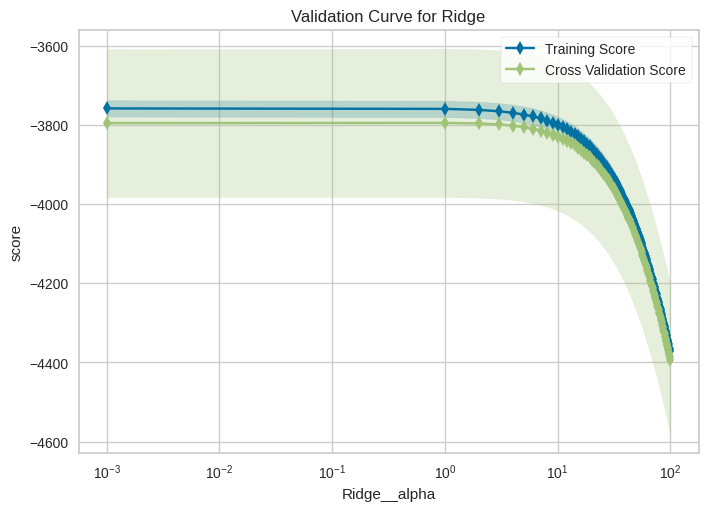

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='Ridge__alpha', ylabel='score'>

In [131]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    pipe_model, param_name="Ridge__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [132]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.252
mean_train_score   -3759.896
Name: 1, dtype: object

In [133]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2580.586     2494.074
mse  14151208.368 13451632.105
rmse     3761.809     3667.647
mape        0.131        0.130

In [134]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [135]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([ -1605.30230411,  -3179.68387612,  -4690.69362163,  -2762.97338276,
         -609.21793943,   -615.73167661,  -3225.24126199,  -3672.10108082,
        -3122.26080664,  -1390.80214222,   -254.77664978,   -640.06715574,
        -4671.73135723,   -541.78022592,   2383.76701713,  -3197.38492714,
        -2689.54548634,   4591.68827754,  -4136.65182793,  -7620.69549834,
        -1229.41845685,  -3758.47932   ,  -2648.9647671 ,   1240.27169909,
          912.08113836,  -4080.98594397,  -3345.62793543,  -1256.88001856,
        -4279.9445379 ,   -173.00177709,  -2055.19490982,    396.98978006,
         2303.91156177,  -1470.74328893,  -2118.57094969,   3284.16475196,
         -459.59492606,   3391.09989662,   -218.01381071,   -919.13285177,
        -2422.17575412,   -198.15012439,   -673.80391592,   -574.98271762,
        -1018.78653077,   2172.93768761,  -2707.68551004,  -2420.15985481,
        -2931.03134187,   4254.62300042,   8235.48354163,    -79.5466889 ,
        -2025.87051976,  

In [136]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Panda', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai IONIQ',
       'make_model_Hyundai TUCSON', 'make_model_Hyundai i20',
       'make_model_Hyundai i30', 'make_model_Mercedes-Benz A 180',
       'make_model_Nissan 350Z', 'make_model_Nissan 370Z',
       'make_model_Nissan Juke', 'make_model_Nissan Micra',
       'make_model_Nissan Pulsar', 'make_model_Nissan Qashqai',
       'make_model_Nissan X-Trail', 'make_model_Opel Adam',
       'make_model_Opel Astra', 'make_model_Opel Cascada',
       'make_model_Opel Corsa', 'make_model_Opel Grandland X',
       'make_model_Opel Insignia', 'make_model_Peugeot 2008',
       'make_model_Peugeot 206', 'make

In [137]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_,
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

# In order to get the coefficients and feature names, the model and encoder name you know through
# the model created with the pipeline should be used as a key.

Coef
mileage                             -22037.201
age                                 -19896.248
make_model_Nissan 370Z               -7620.695
make_model_Dacia Sandero             -4690.694
make_model_Ford Mustang              -4671.731
make_model_Opel Corsa                -4279.945
make_model_Toyota Aygo               -4195.188
make_model_Nissan 350Z               -4136.652
make_model_Opel Adam                 -4080.986
make_model_Nissan Micra              -3758.479
make_model_Fiat Tipo                 -3672.101
make_model_Opel Astra                -3345.628
make_model_Fiat Panda                -3225.241
make_model_Hyundai i20               -3197.385
make_model_Dacia Logan               -3179.684
make_model_Ford Fiesta               -3122.261
make_model_Skoda Fabia               -2931.031
make_model_Fiat 500                  -2762.973
drivetrain_Front                     -2757.293
make_model_SEAT Ibiza                -2707.686
make_model_Hyundai i30               -2689.545
co_emissions                         -2678.039
make_model_Nissan Pulsar             -2648.965
make_model_Renault Clio              -2422.176
make_model_SEAT Leon                 -2420.160
make_model_Peugeot 208               -2118.571
make_model_Opel Insignia             -2055.195
make_model_Skoda Scala               -2025.871
make_model_Toyota Yaris              -1629.888
make_model_Dacia Duster              -1605.302
fuel_type_Liquid/Natural Gas         -1536.043
make_model_Peugeot 207               -1470.743
make_model_Ford Focus                -1390.802
make_model_Opel Cascada              -1256.880
make_model_Nissan Juke               -1229.418
body_type_Off-Road/Pick-up           -1214.939
cons_avg                             -1179.596
gearbox_Manual                       -1160.604
make_model_SEAT Arona                -1018.787
make_model_Toyota Auris               -927.556
make_model_Renault Captur             -919.133
make_model_Volvo V40                  -901.474
drivetrain_4WD                        -892.957
fuel_type_Benzine                     -873.536
make_model_Renault Megane             -673.804
make_model_Ford Mondeo                -640.067
make_model_Fiat 500X                  -615.732
make_model_Fiat 500C                  -609.218
make_model_Toyota Corolla             -601.125
fuel_type_Diesel                      -585.127
make_model_Renault Talisman           -574.983
make_model_Hyundai IONIQ              -541.780
make_model_Peugeot 308                -459.595
previous_owner                        -442.778
upholstery_Cloth                      -308.598
make_model_Ford Kuga                  -254.777
make_model_Peugeot RCZ                -218.014
seller_Private seller                 -207.121
make_model_Renault Kadjar             -198.150
make_model_Opel Grandland X           -173.002
body_type_Sedan                       -138.897
full_service_history_No               -108.408
make_model_Skoda Octavia               -79.547
warranty_Yes                           -70.870
energy_efficiency_class_unefficient    -45.424
energy_efficiency_class_efficient       45.424
warranty_No                             70.870
gears                                   76.242
body_type_Compact                       81.078
body_type_Convertible                  106.045
full_service_history_Yes               108.408
safety_&_security_Package              184.176
seller_Dealer                          207.121
body_type_Station wagon                266.431
make_model_Toyota C-HR                 293.857
upholstery_Part/Full Leather           308.598
comfort_&_convenience_Package          362.922
make_model_Peugeot 2008                396.990
gearbox_Semi-automatic                 436.976
gearbox_Automatic                      723.628
extras                                 736.398
entertainment_&_media_Package          800.352
body_type_Coupe                        900.282
make_model_Nissan X-Trail              912.081
make_model_Volvo C30                  1136.553


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [138]:
from sklearn.linear_model import Lasso

In [139]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [140]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

train         test
R2          0.879        0.876
mae      2583.070     2496.918
mse  14182019.829 13512776.406
rmse     3765.902     3675.973
mape        0.131        0.130

## Cross Validation

In [141]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [142]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2605.169
train_neg_mean_absolute_error                  -2582.291
test_neg_mean_squared_error                -14455439.985
train_neg_mean_squared_error               -14165184.339
test_neg_root_mean_squared_error               -3797.376
train_neg_root_mean_squared_error              -3763.609
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Lasso

In [143]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [144]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinal...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [145]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

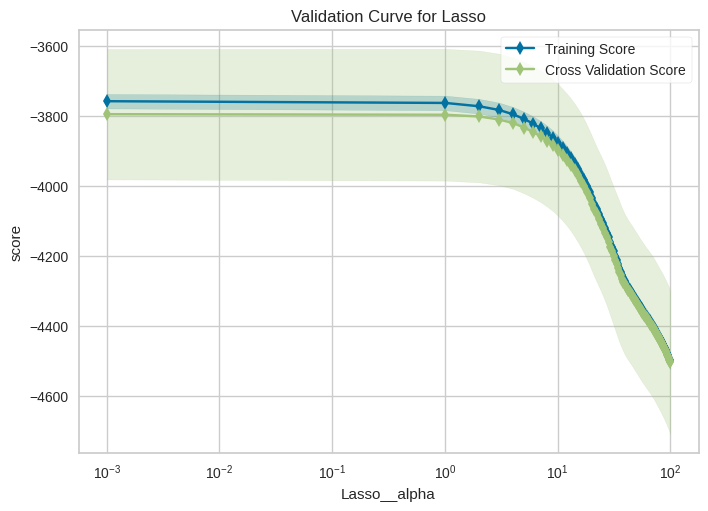

<Axes: title={'center': 'Validation Curve for Lasso'}, xlabel='Lasso__alpha', ylabel='score'>

In [146]:
viz = ValidationCurve(
    model, param_name="Lasso__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [147]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.808
mean_train_score   -3758.756
Name: 0, dtype: object

In [148]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2582.289     2497.357
mse  14144169.797 13451525.347
rmse     3760.874     3667.632
mape        0.131        0.131

In [149]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [150]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_,
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

Coef
mileage                             -22256.436
age                                 -19979.161
make_model_Nissan 370Z               -9047.970
make_model_Ford Mustang              -6036.909
make_model_Nissan 350Z               -5415.667
make_model_Dacia Sandero             -4835.801
make_model_Toyota Aygo               -4465.653
make_model_Opel Corsa                -4422.892
make_model_Opel Adam                 -4262.316
make_model_Nissan Micra              -3920.994
make_model_Fiat Tipo                 -3726.362
make_model_Fiat Panda                -3399.095
make_model_Opel Astra                -3377.727
make_model_Hyundai i20               -3369.264
make_model_Dacia Logan               -3334.517
make_model_Ford Fiesta               -3253.477
make_model_Skoda Fabia               -3054.260
make_model_Fiat 500                  -2954.846
make_model_SEAT Ibiza                -2831.929
make_model_Hyundai i30               -2750.271
make_model_Nissan Pulsar             -2707.575
co_emissions                         -2700.069
drivetrain_Front                     -2628.882
make_model_Renault Clio              -2549.871
make_model_SEAT Leon                 -2478.396
make_model_Peugeot 208               -2250.353
make_model_Skoda Scala               -2103.104
make_model_Opel Insignia             -1923.396
make_model_Toyota Yaris              -1773.950
make_model_Peugeot 207               -1610.559
make_model_Dacia Duster              -1541.723
make_model_Ford Focus                -1442.952
cons_avg                             -1266.760
make_model_Nissan Juke               -1261.246
make_model_Opel Cascada              -1236.437
body_type_Off-Road/Pick-up           -1221.486
make_model_Toyota Auris               -984.644
make_model_SEAT Arona                 -981.468
fuel_type_Liquid/Natural Gas          -932.475
make_model_Fiat 500C                  -897.494
make_model_Renault Captur             -867.636
make_model_Volvo V40                  -857.908
drivetrain_4WD                        -831.394
make_model_Toyota Corolla             -734.373
make_model_Renault Megane             -729.371
upholstery_Cloth                      -589.302
make_model_Ford Mondeo                -555.805
make_model_Renault Talisman           -537.340
make_model_Fiat 500X                  -534.076
make_model_Hyundai IONIQ              -505.755
make_model_Peugeot 308                -498.353
previous_owner                        -395.249
fuel_type_Benzine                     -292.473
make_model_Peugeot RCZ                -273.271
full_service_history_No               -223.902
make_model_Renault Kadjar              -85.113
make_model_Skoda Octavia               -85.093
body_type_Sedan                        -32.438
gears                                  -17.316
gearbox_Manual                         -15.374
warranty_Yes                            -0.000
seller_Private seller                   -0.000
energy_efficiency_class_unefficient     -0.000
upholstery_Part/Full Leather             0.000
full_service_history_Yes                 0.000
make_model_Ford Kuga                     9.851
fuel_type_Diesel                        25.552
make_model_Opel Grandland X             43.240
energy_efficiency_class_efficient       71.383
warranty_No                            147.780
safety_&_security_Package              174.583
body_type_Compact                      184.815
comfort_&_convenience_Package          344.704
body_type_Convertible                  345.849
make_model_Toyota C-HR                 363.146
body_type_Station wagon                388.464
seller_Dealer                          413.838
make_model_Peugeot 2008                433.276
extras                                 744.502
entertainment_&_media_Package          792.671
body_type_Coupe                       1035.462
make_model_Nissan X-Trail             1138.696
make_model_Volvo C30                  1138.949
make_model_Nissan Qashqai             1283.534
gearbox_Semi-automatic                1605.502


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [151]:
from sklearn.linear_model import ElasticNet

In [152]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [153]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

train         test
R2          0.456        0.455
mae      5765.953     5656.486
mse  63983304.917 59308857.424
rmse     7998.956     7701.224
mape        0.309        0.311

## Cross Validation

In [154]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [155]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.455
train_r2                                           0.456
test_neg_mean_absolute_error                   -5766.126
train_neg_mean_absolute_error                  -5761.748
test_neg_mean_squared_error                -64010284.894
train_neg_mean_squared_error               -63903174.324
test_neg_root_mean_squared_error               -7995.033
train_neg_root_mean_squared_error              -7993.913
test_neg_mean_absolute_percentage_error           -0.309
train_neg_mean_absolute_percentage_error          -0.309
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [156]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [157]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinal...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [158]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.95))])

In [159]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.159
mean_train_score   -3759.189
Name: 3, dtype: object

In [160]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2581.048     2494.953
mse  14147391.901 13450428.593
rmse     3761.302     3667.483
mape        0.131        0.131

In [161]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance

In [162]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [163]:
df_feat_imp

Coef
mileage                             -22256.436
age                                 -19979.161
make_model_Nissan 370Z               -9047.970
make_model_Ford Mustang              -6036.909
make_model_Nissan 350Z               -5415.667
make_model_Dacia Sandero             -4835.801
make_model_Toyota Aygo               -4465.653
make_model_Opel Corsa                -4422.892
make_model_Opel Adam                 -4262.316
make_model_Nissan Micra              -3920.994
make_model_Fiat Tipo                 -3726.362
make_model_Fiat Panda                -3399.095
make_model_Opel Astra                -3377.727
make_model_Hyundai i20               -3369.264
make_model_Dacia Logan               -3334.517
make_model_Ford Fiesta               -3253.477
make_model_Skoda Fabia               -3054.260
make_model_Fiat 500                  -2954.846
make_model_SEAT Ibiza                -2831.929
make_model_Hyundai i30               -2750.271
make_model_Nissan Pulsar             -2707.575
co_emissions                         -2700.069
drivetrain_Front                     -2628.882
make_model_Renault Clio              -2549.871
make_model_SEAT Leon                 -2478.396
make_model_Peugeot 208               -2250.353
make_model_Skoda Scala               -2103.104
make_model_Opel Insignia             -1923.396
make_model_Toyota Yaris              -1773.950
make_model_Peugeot 207               -1610.559
make_model_Dacia Duster              -1541.723
make_model_Ford Focus                -1442.952
cons_avg                             -1266.760
make_model_Nissan Juke               -1261.246
make_model_Opel Cascada              -1236.437
body_type_Off-Road/Pick-up           -1221.486
make_model_Toyota Auris               -984.644
make_model_SEAT Arona                 -981.468
fuel_type_Liquid/Natural Gas          -932.475
make_model_Fiat 500C                  -897.494
make_model_Renault Captur             -867.636
make_model_Volvo V40                  -857.908
drivetrain_4WD                        -831.394
make_model_Toyota Corolla             -734.373
make_model_Renault Megane             -729.371
upholstery_Cloth                      -589.302
make_model_Ford Mondeo                -555.805
make_model_Renault Talisman           -537.340
make_model_Fiat 500X                  -534.076
make_model_Hyundai IONIQ              -505.755
make_model_Peugeot 308                -498.353
previous_owner                        -395.249
fuel_type_Benzine                     -292.473
make_model_Peugeot RCZ                -273.271
full_service_history_No               -223.902
make_model_Renault Kadjar              -85.113
make_model_Skoda Octavia               -85.093
body_type_Sedan                        -32.438
gears                                  -17.316
gearbox_Manual                         -15.374
warranty_Yes                            -0.000
seller_Private seller                   -0.000
energy_efficiency_class_unefficient     -0.000
upholstery_Part/Full Leather             0.000
full_service_history_Yes                 0.000
make_model_Ford Kuga                     9.851
fuel_type_Diesel                        25.552
make_model_Opel Grandland X             43.240
energy_efficiency_class_efficient       71.383
warranty_No                            147.780
safety_&_security_Package              174.583
body_type_Compact                      184.815
comfort_&_convenience_Package          344.704
body_type_Convertible                  345.849
make_model_Toyota C-HR                 363.146
body_type_Station wagon                388.464
seller_Dealer                          413.838
make_model_Peugeot 2008                433.276
extras                                 744.502
entertainment_&_media_Package          792.671
body_type_Coupe                       1035.462
make_model_Nissan X-Trail             1138.696
make_model_Volvo C30                  1138.949
make_model_Nissan Qashqai             1283.534
gearbox_Semi-automatic                1605.502


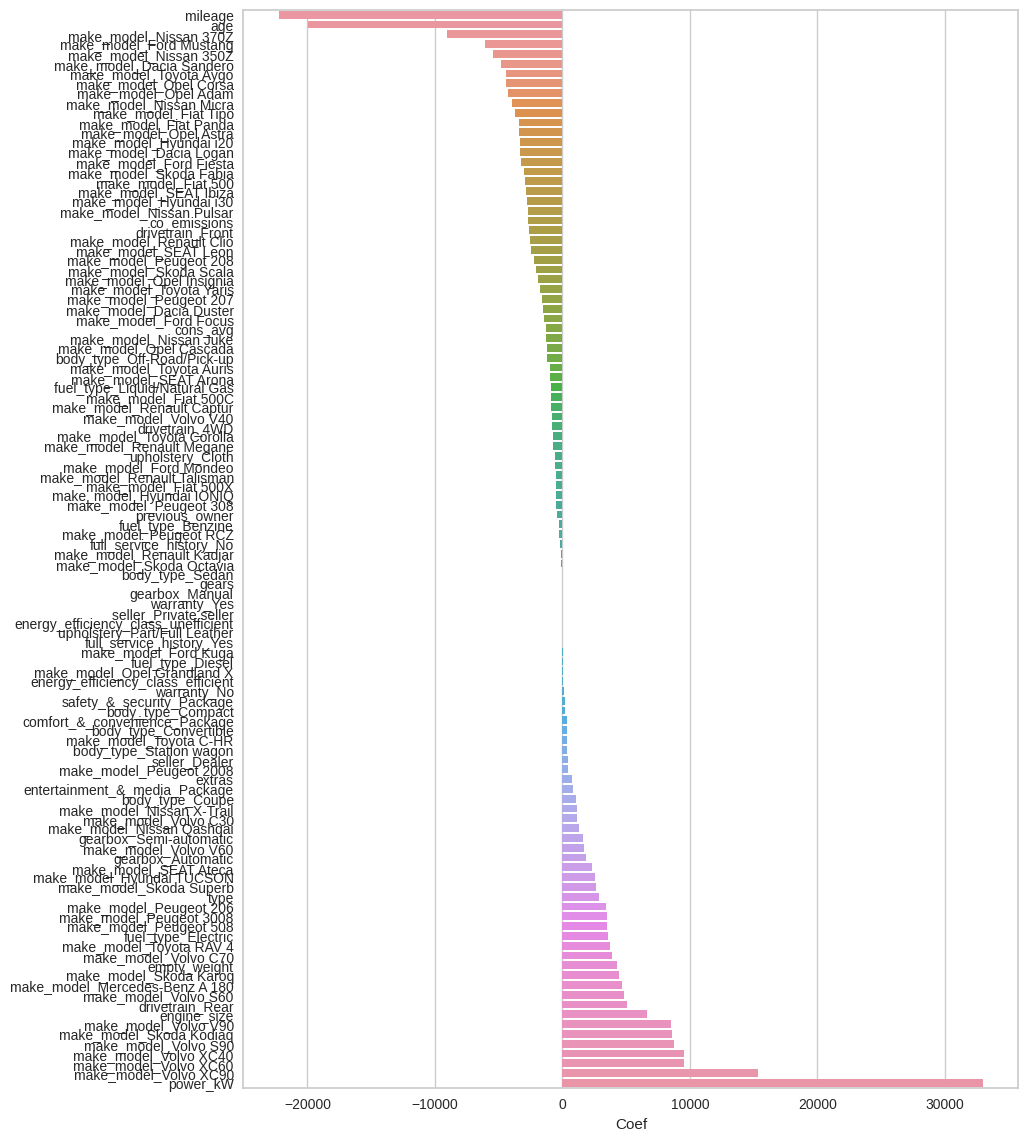

In [164]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp,
            x=df_feat_imp.Coef,
            y=df_feat_imp.index);

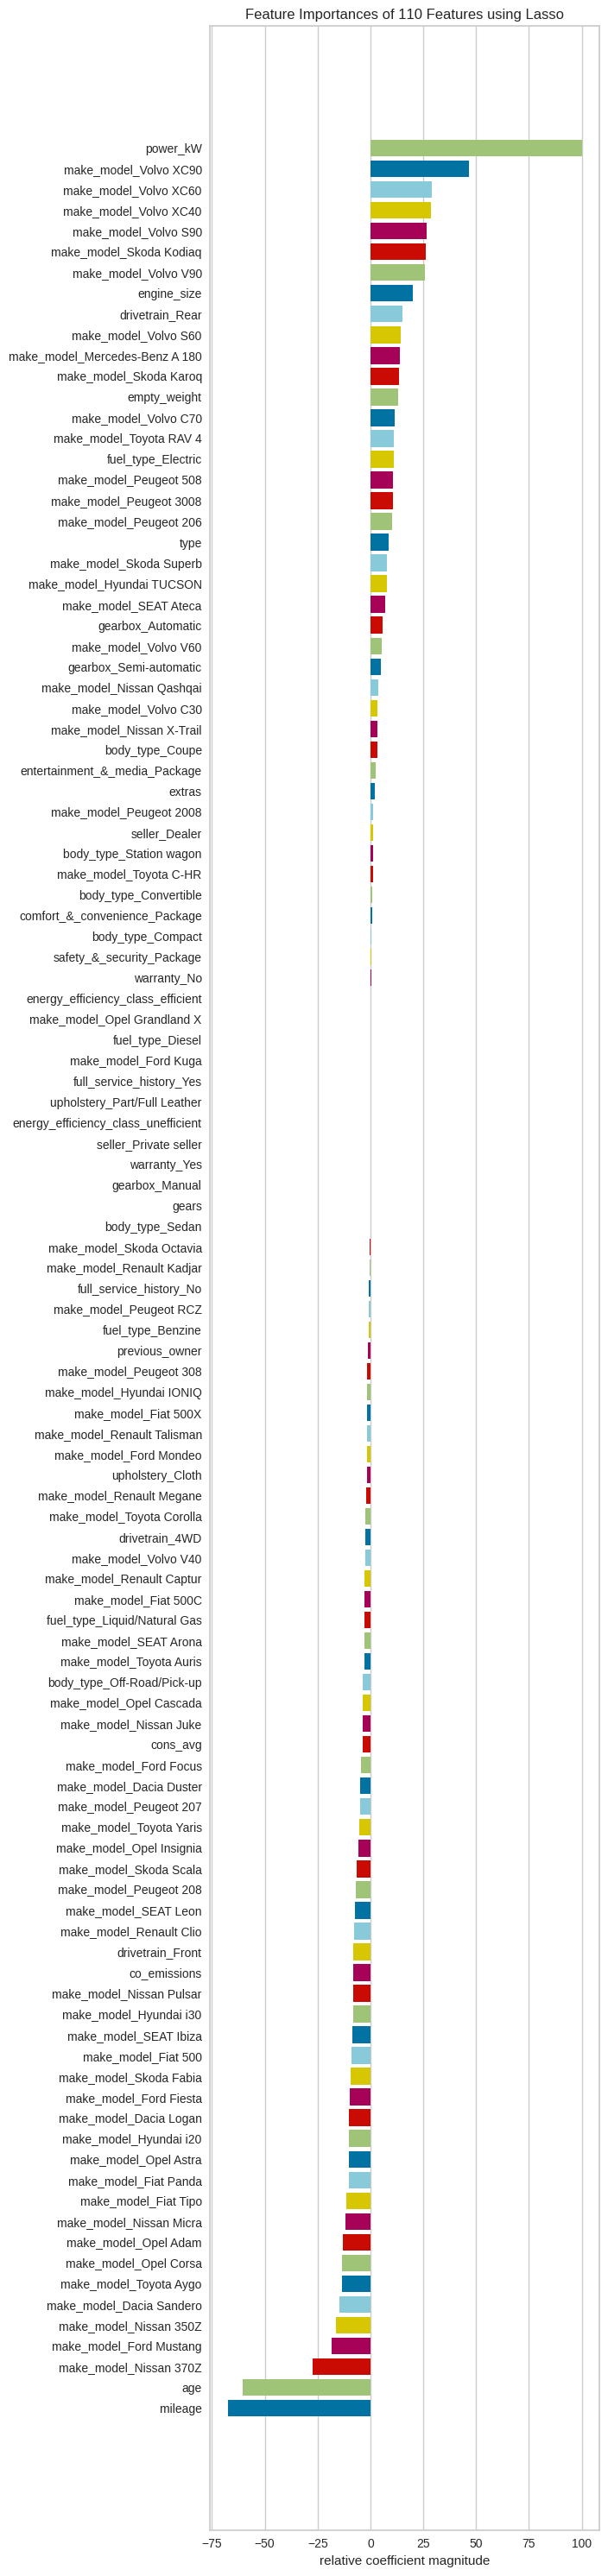

In [165]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [166]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

# we select the top 6 features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the featurs that have the most impact on the prediction.

# Although the type feature does not contribute much to the prediction,
# it has been kept in the data in order to have a feature in our data that we will make the ordinal transformation.

In [167]:
df_new

make_model  power_kW    mileage   age  engine_size  \
0      Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000   
2      Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000   
3      Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000   
4      Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000   
5      Mercedes-Benz A 180   100.000     25.000 1.000     1332.000   
...                    ...       ...        ...   ...          ...   
18190            Volvo S90   140.000  93757.000 4.000     1969.000   
18191            Volvo S90   140.000  93757.000 4.000     1969.000   
18192            Volvo V40    88.000 114000.000 4.000     1969.000   
18194            Volvo S90   288.000  40345.000 3.000     1969.000   
18196            Volvo S90   187.000  94343.000 5.000     1969.000   

                 type     price  
0                Used 24400.000  
2                Used 29800.000  
3                Used 21000.000  
4                Used 26800.000  
5      Pre-registered 32900.000  
...               ...       ...  
18190            Used 27190.000  
18191            Used 27190.000  
18192            Used 13000.000  
18194            Used 37600.000  
18196            Used 29900.000  

[16370 rows x 7 columns]

In [168]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 5 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
X_train.head()

make_model  power_kW   mileage   age  engine_size  type
7674       SEAT Leon   213.000 35977.000 3.000     1984.000  Used
13227   Nissan Micra    66.000 74314.000 4.000     1461.000  Used
8532   Skoda Octavia    85.000 39563.000 3.000      999.000  Used
4458     Peugeot 508   147.000 80300.000 5.000     1997.000  Used
15437    Hyundai i30   100.000 24576.000 6.000     1591.000  Used

In [171]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) #MinMaxScaler()

In [172]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

train         test
R2          0.866        0.860
mae      2765.883     2680.107
mse  15773600.186 15221429.641
rmse     3971.599     3901.465
mape        0.140        0.140

## Cross Validate

In [173]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [174]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.864
train_r2                                           0.866
test_neg_mean_absolute_error                   -2783.879
train_neg_mean_absolute_error                  -2764.986
test_neg_mean_squared_error                -15980577.740
train_neg_mean_squared_error               -15762787.100
test_neg_root_mean_squared_error               -3992.600
train_neg_root_mean_squared_error              -3970.176
test_neg_mean_absolute_percentage_error           -0.141
train_neg_mean_absolute_percentage_error          -0.140
dtype: float64

In [175]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [176]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

# We assign the metrics we get from all models to the scores variable in dict format.

Model  r2_score      mae     rmse  mape
0   linear_m     0.876 2495.546 3669.300 0.131
1    ridge_m     0.876 2494.074 3667.647 0.130
2    lasso_m     0.876 2497.357 3667.632 0.131
3  elastic_m     0.876 2494.953 3667.483 0.131
4    final_m     0.860 2680.107 3901.465 0.140

In [177]:
compare.sort_values(by="r2_score", ascending=False) #  ascending=False sorts in descending (high-->low) order.

Model  r2_score      mae     rmse  mape
3  elastic_m     0.876 2494.953 3667.483 0.131
2    lasso_m     0.876 2497.357 3667.632 0.131
1    ridge_m     0.876 2494.074 3667.647 0.130
0   linear_m     0.876 2495.546 3669.300 0.131
4    final_m     0.860 2680.107 3901.465 0.140

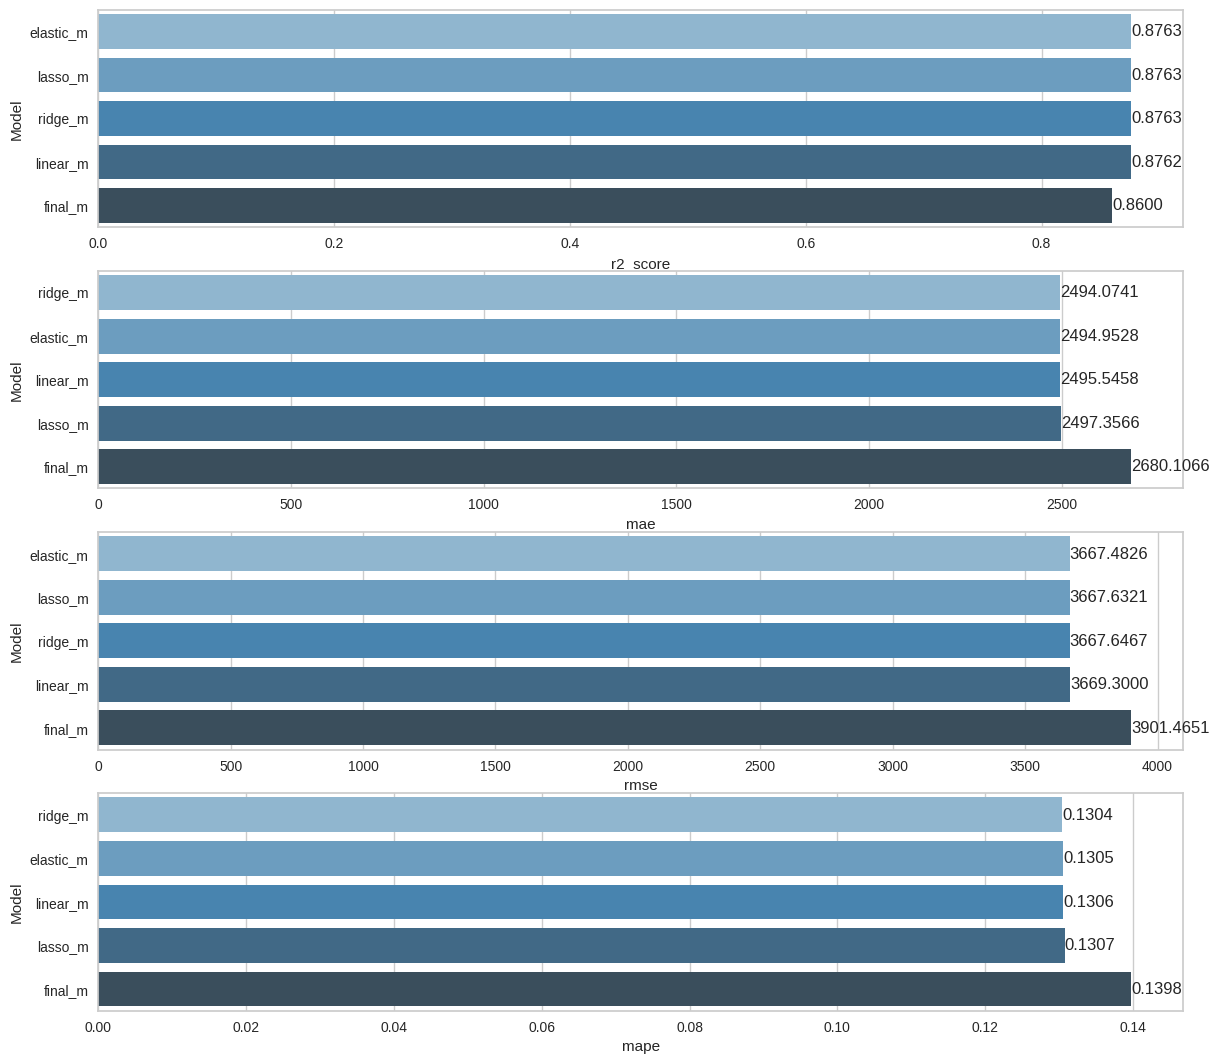

In [178]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")
plt.show()

## Final Model and Prediction new observation

In [179]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [180]:
X.head()

make_model  power_kW    mileage   age  engine_size            type
0  Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000            Used
2  Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000            Used
3  Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000            Used
4  Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000            Used
5  Mercedes-Benz A 180   100.000     25.000 1.000     1332.000  Pre-registered

In [181]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 7 features, as our final model.
# In the lasso model with 7 features, we re-build the model with the hyperparameter, where we get the best score.

In [182]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do here, respectively?
# The first action in the final_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to which ordinalencoder conversion will be applied.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, they are left as is.
# Since the second action in the final_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get. Dummies features consisting of 0s and 1s in our data
# Since, minmaxscale was applied so that these observations remain 0 and 1 again.
# The third action in the final_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [183]:
X

make_model  power_kW    mileage   age  engine_size  \
0      Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000   
2      Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000   
3      Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000   
4      Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000   
5      Mercedes-Benz A 180   100.000     25.000 1.000     1332.000   
...                    ...       ...        ...   ...          ...   
18190            Volvo S90   140.000  93757.000 4.000     1969.000   
18191            Volvo S90   140.000  93757.000 4.000     1969.000   
18192            Volvo V40    88.000 114000.000 4.000     1969.000   
18194            Volvo S90   288.000  40345.000 3.000     1969.000   
18196            Volvo S90   187.000  94343.000 5.000     1969.000   

                 type  
0                Used  
2                Used  
3                Used  
4                Used  
5      Pre-registered  
...               ...  
18190            Used  
18191            Used  
18192            Used  
18194            Used  
18196            Used  

[16370 rows x 6 columns]

In [184]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [185]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

make_model  power_kW    mileage   age  engine_size            type
0  Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000            Used
2  Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000            Used
3  Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000            Used
4  Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000            Used
5  Mercedes-Benz A 180   100.000     25.000 1.000     1332.000  Pre-registered

In [186]:
new_obs = pd.DataFrame([my_dict])
new_obs

# we found that the feature rankings are the same

make_model  power_kW  mileage  age  engine_size  type
0  Mercedes-Benz A 180        85    30000    3         1461  Used

In [187]:
final_model.predict(new_obs)

array([27100.53480812])

In [188]:
# when feature order is different

my_dict = {
    "type": "Used",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "engine_size": 1461,
    "mileage": 30000,
    "age": 3
}

new_obs = pd.DataFrame([my_dict])
new_obs

type  power_kW           make_model  engine_size  mileage  age
0  Used        85  Mercedes-Benz A 180         1461    30000    3

In [189]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

array([27100.53480812])

In [190]:
# What does pipe_model.predict(new_obs) do in order?
# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is performed according to the information of X data to the features(cat_onehot)
# to be applied onehotencoder conversion in new_obs data.
# 2. Ordinalencoder conversion is performed according to the information of X data to the features(cat_ordinal)
# in the new_obs data to be converted to ordinalencoder.
# 3. The new_obs data is left as is, without any action, except for the converted features.
# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric new_obs according to
# the min and max information of the X data.
# The third action in the pipe_model is Lasso();
# 5. The new_obs data transformed and scaled according to X's information is predicted by the Lasso model.

In [191]:
# Important note: make_column_transformer function assigns categorical features to the beginning of df
# and numeric features to the end of df in accordance with the transformation order in the df it transforms.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___